In [ ]:
#
#      Assignment 3
#      IRVIN MACEKE
#      201499971
#

In [ ]:
#
#
#      Data Preparation
#
#

In [78]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Book1.csv'
crime_data = pd.read_csv(file_path)

# Explore the dataset
# Display the first few rows to understand its structure
print(crime_data.head())

# Check for missing values and data types
print(crime_data.info())

# Perform basic summary statistics
print(crime_data.describe())

  Location        Category       Year   Count
0       ZA  Contact Crimes  2011/2012  615935
1       ZA  Contact Crimes  2012/2013  608724
2       ZA  Contact Crimes  2013/2014  611574
3       ZA  Contact Crimes  2014/2015  616973
4       ZA  Contact Crimes  2015/2016  623223
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  840 non-null    object
 1   Category  840 non-null    object
 2   Year      840 non-null    object
 3   Count     840 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.4+ KB
None
               Count
count     840.000000
mean    61766.336905
std    111240.587975
min       377.000000
25%      8083.000000
50%     24581.500000
75%     63066.750000
max    653659.000000


In [ ]:
# Data Summary:

# The dataset consists of 840 rows, each representing a unique combination 
# of location, crime category, and year.
# There are no missing values in any of the columns, indicating that the 
# dataset is complete.
# The "Count" column has a wide range of values, with a minimum of 377 
# reported crimes and a maximum of 653,659 reported crimes in a given year.
# On average, there are approximately 61,766 reported crimes, but the 
# standard deviation is relatively high at approximately 111,241, 
# indicating significant variability in crime counts across different 
# locations, categories, and years.

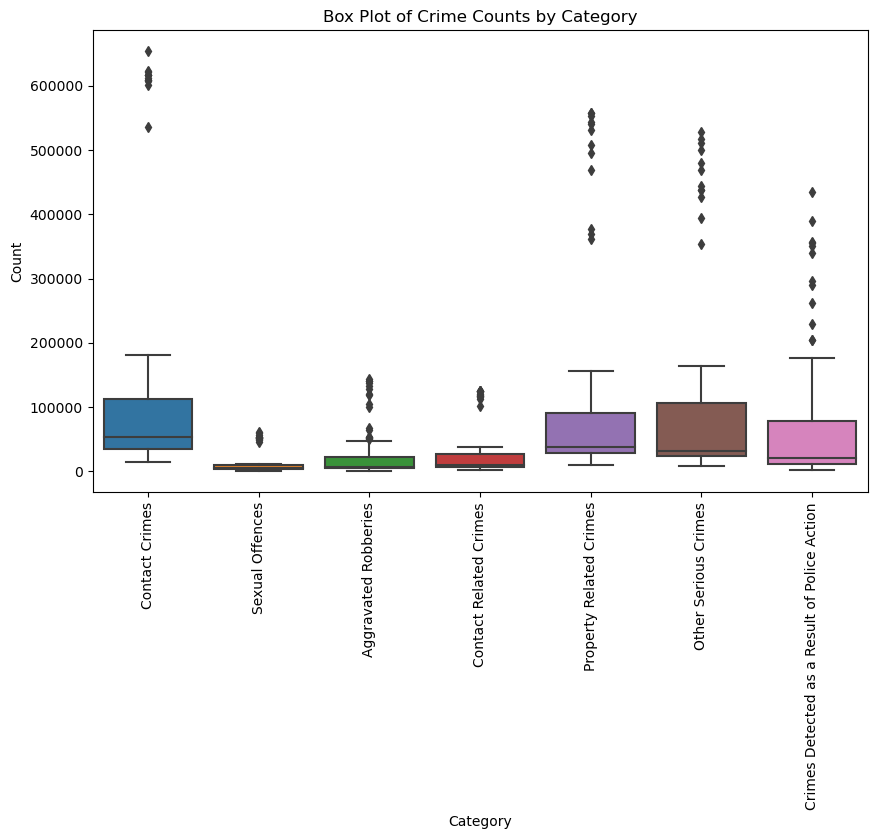

In [35]:
# Data Cleaning and Preprocessing


missing_values = crime_data.isnull().sum()

crime_data['Count'].fillna(crime_data['Count'].mean(), inplace=True)

crime_data['Year'] = crime_data['Year'].str.extract(r'(\d{4})', expand=False).astype(int)
crime_data['Count'] = crime_data['Count'].astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Count', data=crime_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Crime Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



In [ ]:
# STEP 2
#   Exploratory Data Analysis (EDA):
#   performING EDA to understand the patterns, trends, and 
#   seasonality in MY data. This will help me choose an appropriate model.
#

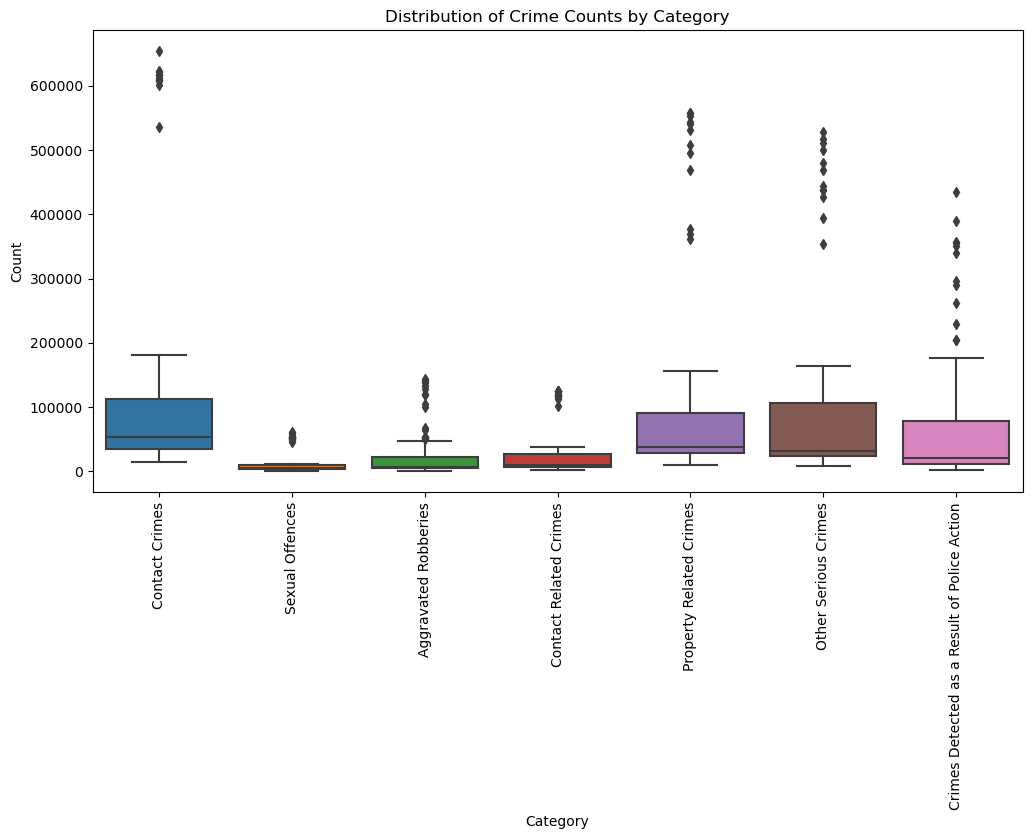

In [5]:
# Visualize the distribution of crime counts by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Count', data=crime_data)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



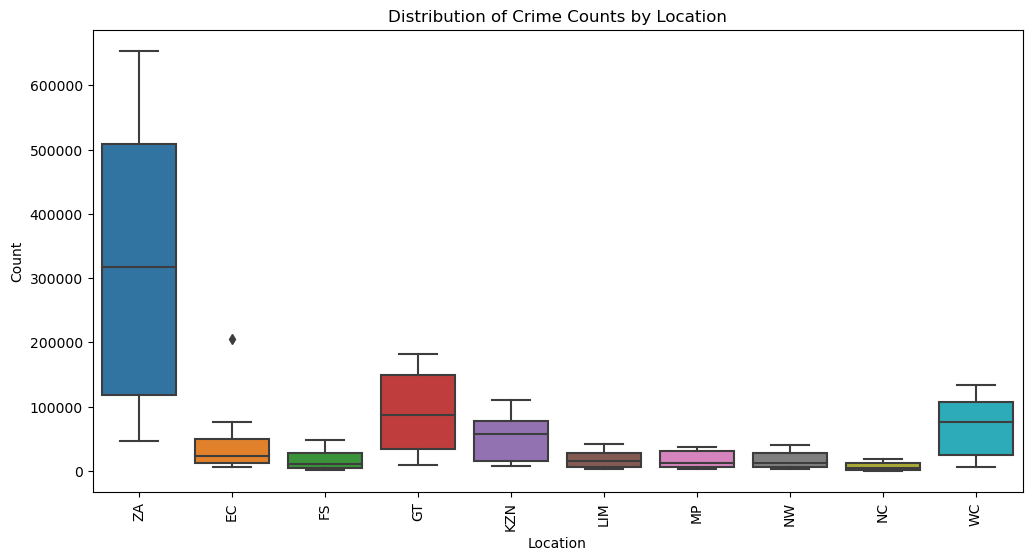

In [36]:
# Visualize the distribution of crime counts by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Count', data=crime_data)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

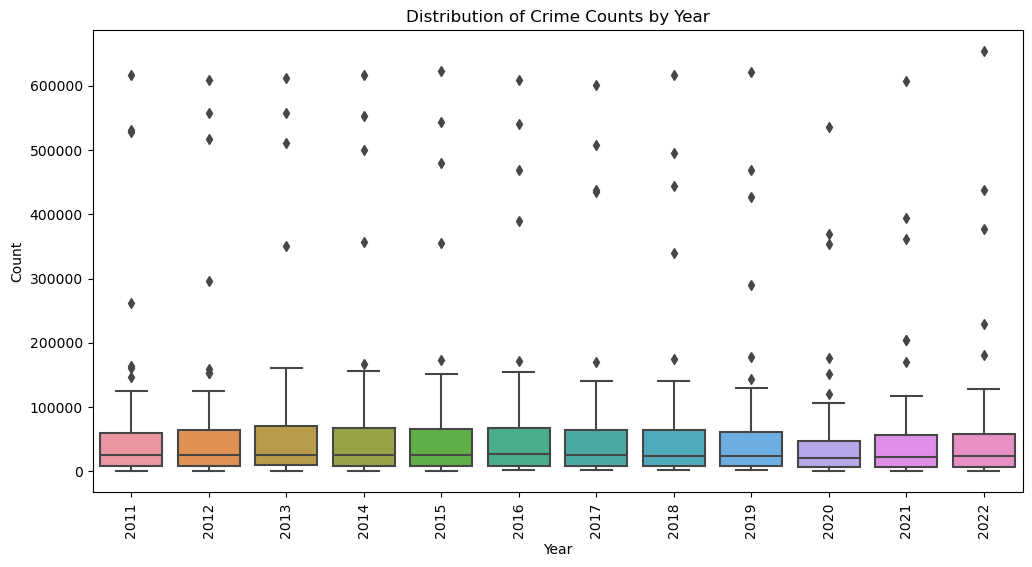

In [7]:
# Visualize the distribution of crime counts by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Count', data=crime_data)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

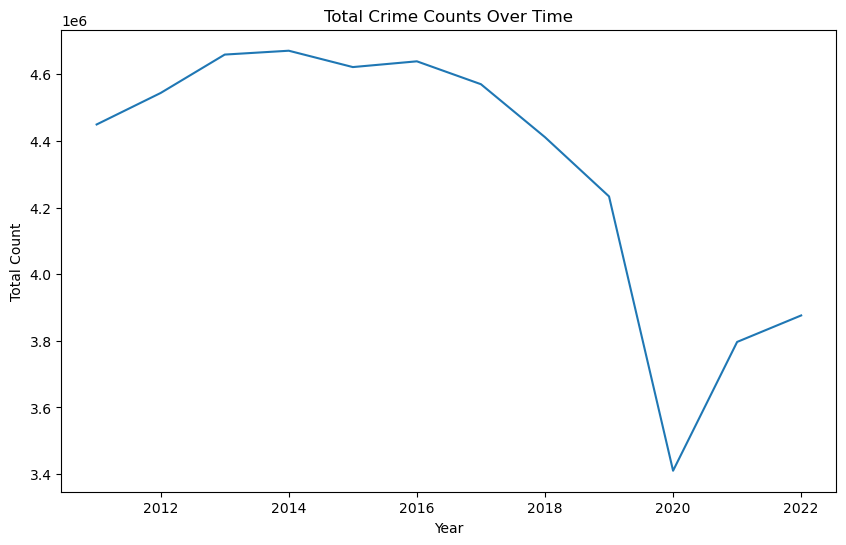

In [8]:
# Explore trends over time (e.g., total crime counts by year)
total_crime_by_year = crime_data.groupby('Year')['Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', data=total_crime_by_year)
plt.title('Total Crime Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

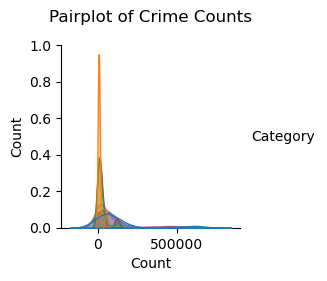

In [9]:


sns.pairplot(crime_data, vars=['Count'], hue='Category')
plt.title('Pairplot of Crime Counts')
plt.show()

Mean Count: 61766.336904761905
Median Count: 24581.5
Standard Deviation of Count: 111240.58797531475


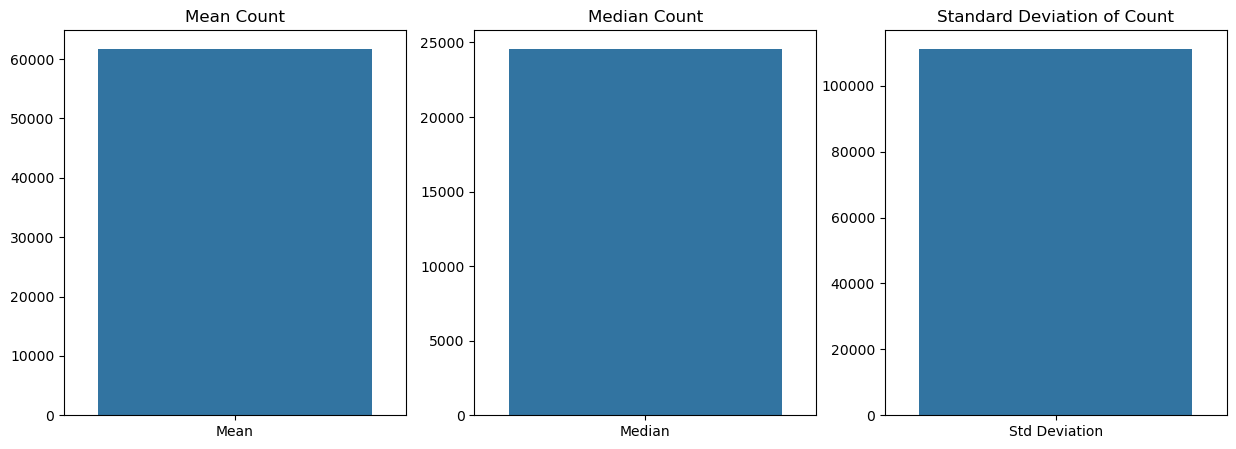

In [45]:

# Calculate the mean
mean_count = crime_data['Count'].mean()

# Calculate the median
median_count = crime_data['Count'].median()

# Calculate the standard deviation
std_deviation_count = crime_data['Count'].std()

# Print the results
print(f"Mean Count: {mean_count}")
print(f"Median Count: {median_count}")
print(f"Standard Deviation of Count: {std_deviation_count}")



# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the mean
sns.barplot(x=['Mean'], y=[mean_count], ax=axes[0])
axes[0].set_title('Mean Count')

# Plot the median
sns.barplot(x=['Median'], y=[median_count], ax=axes[1])
axes[1].set_title('Median Count')

# Plot the standard deviation
sns.barplot(x=['Std Deviation'], y=[std_deviation_count], ax=axes[2])
axes[2].set_title('Standard Deviation of Count')

plt.show()



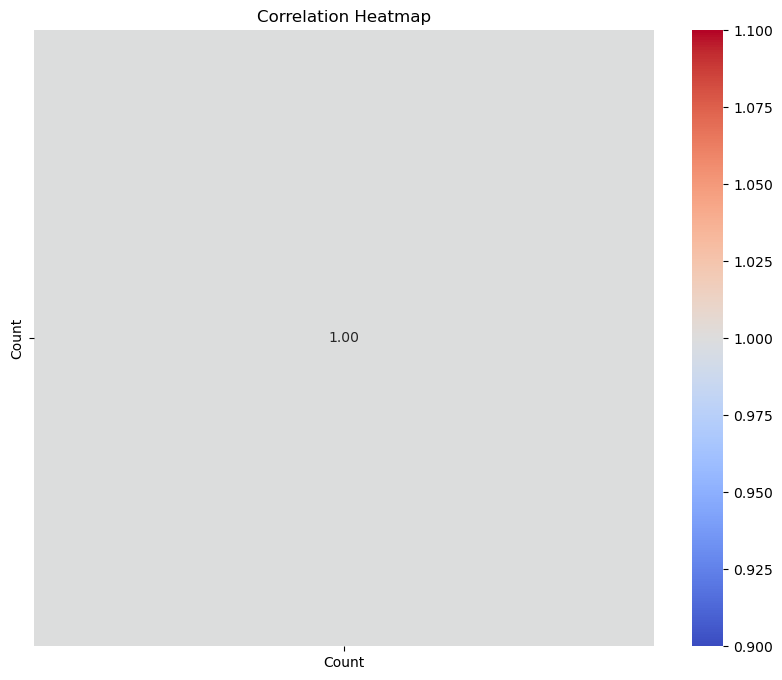

In [82]:

# Calculate correlation matrix for your actual DataFrame containing crime rates and potential factors
correlation_matrix = crime_data.corr()

# Create a heatmap of correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Step 3

# Model Selection:

# Based on your EDA and stationarity analysis, consider various time series 
# models. Some common models include:
# ARIMA (AutoRegressive Integrated Moving Average): This is a versatile model 
# that can handle a wide range of time
# series patterns. You'll need to determine the orders (p, d, q) based on the
# ACF and PACF plots.
# Seasonal Decomposition of Time Series (STL): If your data exhibits strong 
# seasonality, the STL decomposition can 
# help you extract the seasonal, trend, and residual components.
# Exponential Smoothing (ETS): ETS models are suitable for data with trend 
# and seasonality.
# Prophet: If your data has daily observations and seasonality, Facebook's 
# Prophet package can be a good choice.
# SARIMA (Seasonal ARIMA): An extension of ARIMA for seasonal data.




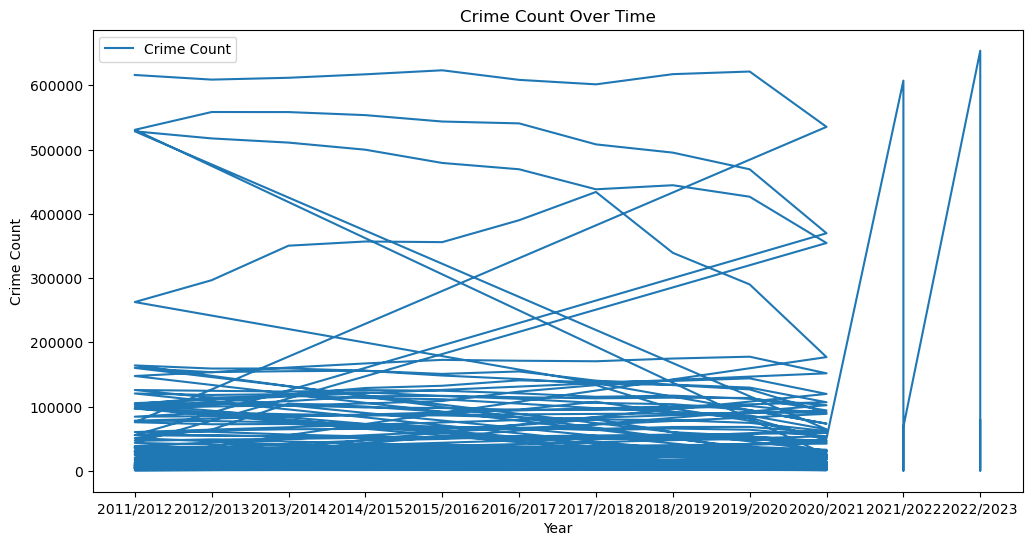

ADF Statistic: -5.891650001952383
p-value: 2.914925508600266e-07


<Figure size 1200x600 with 0 Axes>

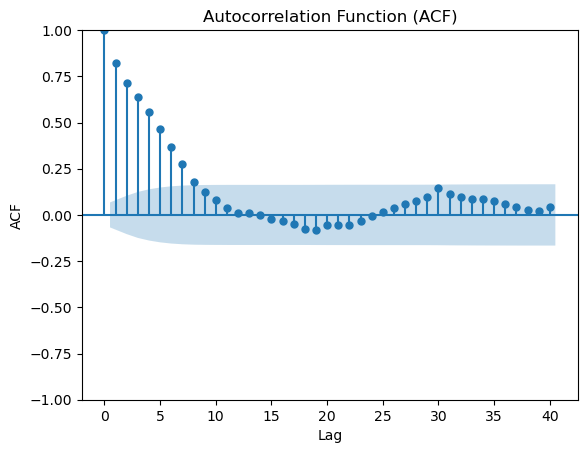

<Figure size 1200x600 with 0 Axes>

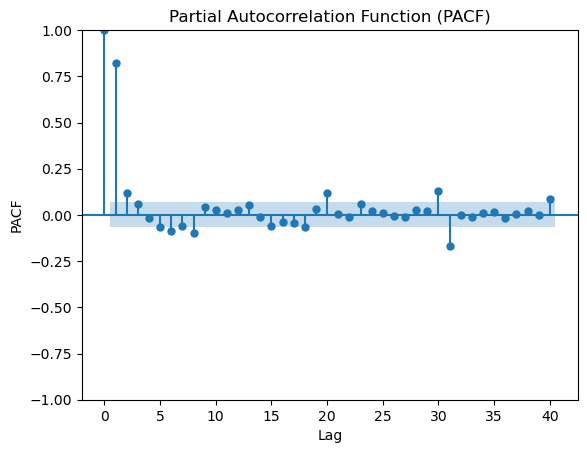

RMSE: nan


In [68]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


plt.figure(figsize=(12, 6))
plt.plot(crime_data['Year'], crime_data['Count'], label='Crime Count')
plt.title('Crime Count Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend()
plt.show()


adf_result = adfuller(crime_data['Count'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

plt.figure(figsize=(12, 6))
acf_plot = plot_acf(crime_data['Count'], lags=40)  # Adjust the number of lags
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
pacf_plot = plot_pacf(crime_data['Count'], lags=40)  # Adjust the number of lags
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

p = 1  
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  


model = SARIMAX(crime_data['Count'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

train_size = int(len(crime_data) * 0.8)
train_data = crime_data['Count'][:train_size]
test_data = crime_data['Count'][train_size:]

forecast = results.get_forecast(steps=len(test_data))
predicted_mean = forecast.predicted_mean

rmse = np.sqrt(((predicted_mean - test_data) ** 2).mean())
print(f'RMSE: {rmse}')

forecast_steps = 12  # Example: Forecast the next 12 time points
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean




In [ ]:
# The seasonal decomposition plot helps us understand how the original 
# time series data can be broken down into its different 
# components: trend, seasonality, and residuals. This understanding can 
# be valuable for further analysis, forecasting, 
# and making data-driven decisions.

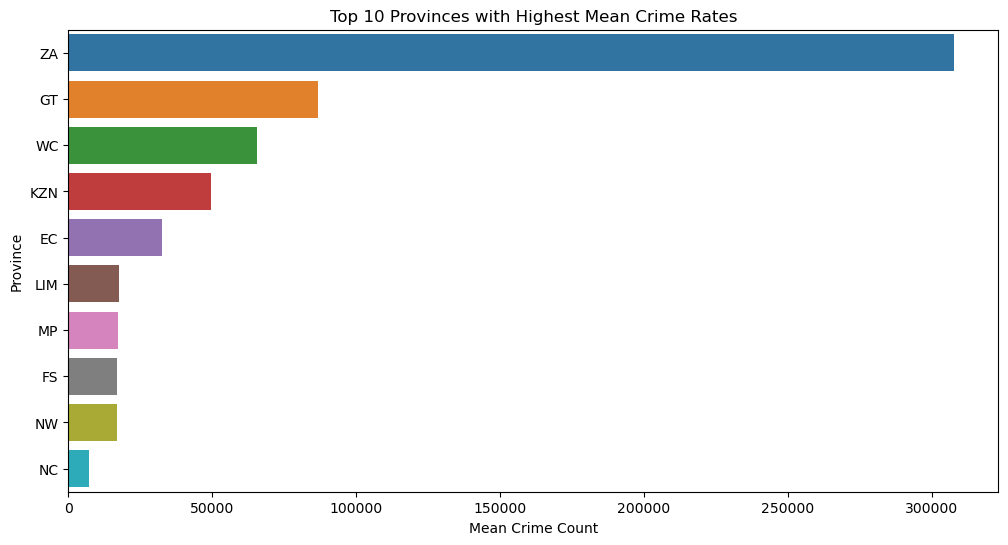

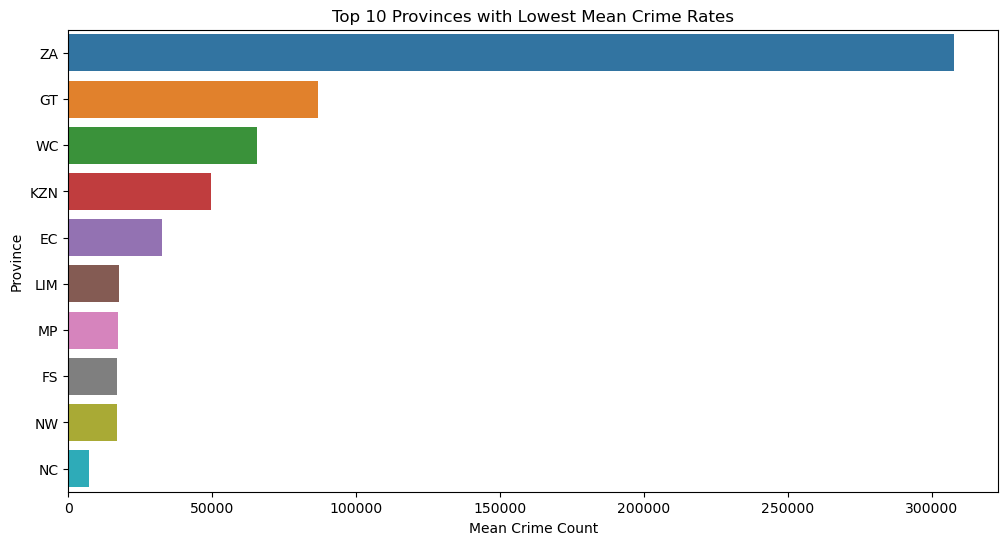

Regions with Highest Mean Crime Rates:
  Location           mean    median
9       ZA  307703.035714  318007.5
2       GT   86605.940476   86783.0
8       WC   65500.452381   75887.0
3      KZN   49442.392857   57100.5
0       EC   32427.761905   23446.0
Regions with Lowest Mean Crime Rates:
  Location          mean   median
4      LIM  17766.702381  15594.5
5       MP  17279.750000  12231.5
1       FS  16932.464286  10193.0
7       NW  16786.214286  12917.5
6       NC   7218.654762   4182.5


In [10]:


# Analyze Distribution by Location
crime_by_location = crime_data.groupby('Location')['Count'].agg(['mean', 'median']).reset_index()

# Sort by mean crime rate (highest to lowest)
sorted_by_mean = crime_by_location.sort_values(by='mean', ascending=False)

# Sort by median crime rate (highest to lowest)
sorted_by_median = crime_by_location.sort_values(by='median', ascending=False)

# Visualize the distribution of crimes by location (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='Location', data=sorted_by_mean.head(10))
plt.title('Top 10 Provinces with Highest Mean Crime Rates')
plt.xlabel('Mean Crime Count')
plt.ylabel('Province')
plt.show()

# Visualize the distribution of crimes by location (bottom 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='Location', data=sorted_by_mean.tail(10))
plt.title('Top 10 Provinces with Lowest Mean Crime Rates')
plt.xlabel('Mean Crime Count')
plt.ylabel('Province')
plt.show()

# Identify regions with highest and lowest crime rates based on mean or median
highest_crime_regions = sorted_by_mean.head(5)
lowest_crime_regions = sorted_by_mean.tail(5)

print("Regions with Highest Mean Crime Rates:")
print(highest_crime_regions)

print("Regions with Lowest Mean Crime Rates:")
print(lowest_crime_regions)


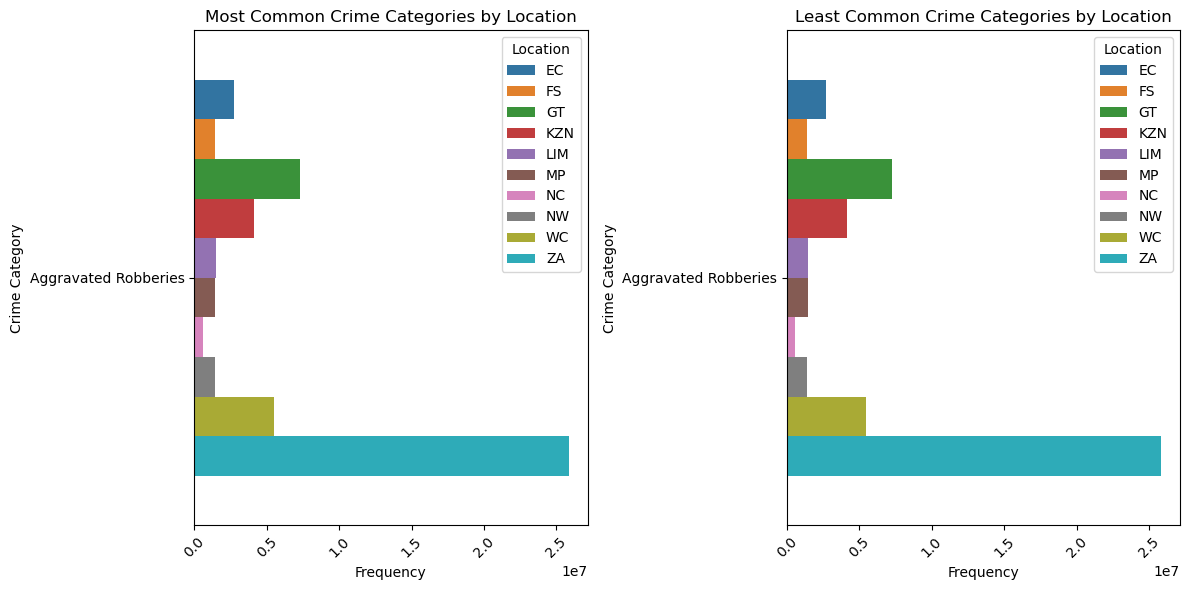

In [83]:
import warnings
warnings.filterwarnings("ignore")
crime_category_by_location =crime_data.groupby(['Category', 'Location']).sum()['Count'].reset_index()


crime_category_by_location['Frequency'] = crime_category_by_location.groupby('Location')['Count'].transform('sum')


most_common_crime = crime_category_by_location.loc[crime_category_by_location.groupby('Location')['Frequency'].idxmax()]
least_common_crime = crime_category_by_location.loc[crime_category_by_location.groupby('Location')['Frequency'].idxmin()]


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Category', hue='Location', data=most_common_crime)
plt.title('Most Common Crime Categories by Location')
plt.xlabel('Frequency')
plt.ylabel('Crime Category')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Category', hue='Location', data=least_common_crime)
plt.title('Least Common Crime Categories by Location')
plt.xlabel('Frequency')
plt.ylabel('Crime Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




In [ ]:
# The graphs provided summarizes crime data for different regions, 
# specifically focusing on the mean and median crime rates. 


# Regions with Highest Mean Crime Rates:

# These are regions where, on average, the reported crime rates are the highest.
# "ZA" represents a region, and its mean crime rate is approximately 307,703. 
# This means that, on average, there are about 307,703 reported crimes in this 
# region.

# The median crime rate for this region is approximately 318,007.5. 
# The median is another measure of central tendency, and it's slightly 
# higher than the mean, indicating that there are some high outliers 
# in the data for this region.

# The table goes on to list other regions like "GT," "WC," "KZN," 
# and "EC," along with their respective mean and median crime rates, 
# in descending order of mean crime rates. These regions also have 
# relatively high crime rates compared to the regions listed under 
# "Regions with Lowest Mean Crime Rates."

# Regions with Lowest Mean Crime Rates:

# These are regions where, on average, the reported crime rates are the lowest.
# "LIM" represents one of these regions, and its mean crime rate is approximately 
# 17,766.7. This indicates that, on average, there are about 17,767 reported 
# crimes in this region, which is significantly lower than the regions with the 
# highest mean crime rates.

# The median crime rate for this region is approximately 15,594.5, which is lower
# than the mean. This suggests that the majority of data points in this region's 
# crime rate distribution are below the mean.

# Similarly, the table lists other regions like "MP," "FS," "NW," and "NC" along 
# with their respective mean and median crime rates, in ascending order of mean 
# crime rates. These regions have relatively lower crime rates compared to the 
# regions with the highest mean crime rates.

# In summary, this graphs provides a comparison of regions based on their mean 
# and median crime rates, allowing us to identify regions with both the highest
# and lowest average levels of reported crime.



Root Mean Squared Error (RMSE): 100945.63461656522
R-squared (R2): -0.002960104207817338


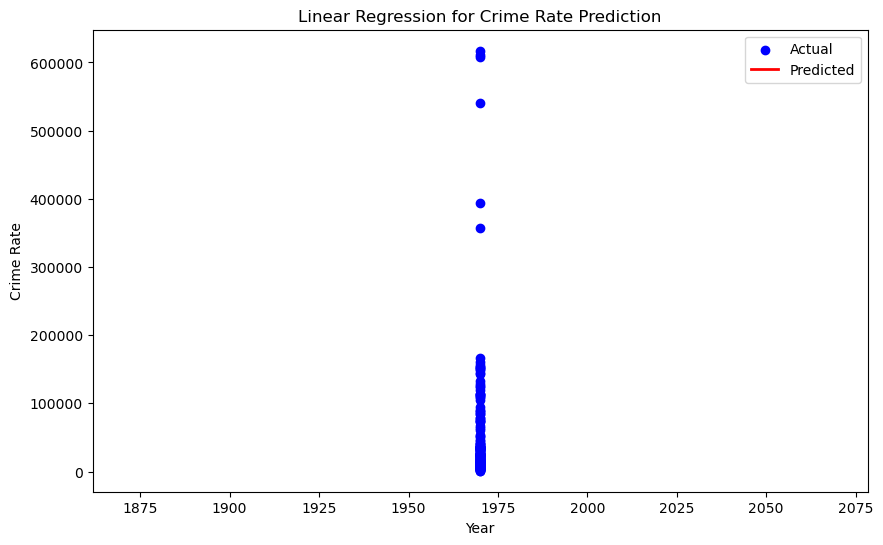

Future Predictions:
Year 2023: Predicted Crime Rate = 62863.14
Year 2024: Predicted Crime Rate = 62863.14
Year 2025: Predicted Crime Rate = 62863.14


In [29]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


crime_data['Year'] = pd.to_datetime(crime_data['Year']).dt.year
data = crime_data[['Year', 'Count']]


X = data['Year'].values.reshape(-1, 1)
y = data['Count'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression for Crime Rate Prediction')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()


future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_predictions = model.predict(future_years)

print("Future Predictions:")
for year, prediction in zip([2023, 2024, 2025], future_predictions):
    print(f"Year {year}: Predicted Crime Rate = {prediction:.2f}")


In [ ]:



# Crime by Location:

# Analyze the distribution of crimes across different provinces or locations.
# Identify regions with the highest and lowest crime rates.
# Visualize crime rates on a map if geographical data is available.

# Crime by Category:

#  Analyze the types of crimes and their frequencies.
# Identify the most common and least common types of crimes.
# Explore whether certain crime categories are more prevalent in 
# specific regions.

# Time Trends:

# Analyze how crime rates have changed over the years.
# Identify any significant trends or patterns.
# Consider seasonal variations if applicable.

# Correlations and Factors:

# Explore potential factors that may influence crime rates, such as 
# economic indicators, demographics, or policy changes.
# Analyze correlations between crime rates and these factors.
# Create visualizations to illustrate these relationships.

# Hypothesis Testing:

# Formulate hypotheses about factors that might influence crime rates.
# Conduct statistical tests to determine whether there are
# significant differences or relationships.




Pearson's Correlation Coefficient: 0.028918465832999885
P-Value: 0.6711209182383223
Fail to reject the null hypothesis: There is no significant relationship.


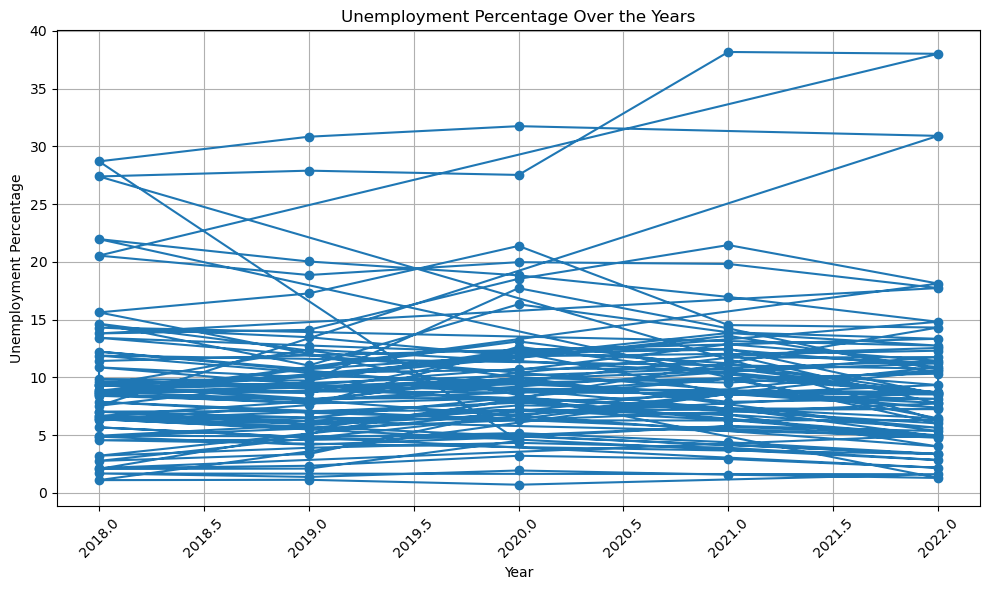

In [50]:

import scipy.stats as stats

data = pd.read_csv('Graduates.csv')


years = data['Year']
percentages = data['Percentage']


correlation_coefficient, p_value = stats.pearsonr(years, percentages)


print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship.")
    
    


plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker='o', linestyle='-')
plt.title('Unemployment Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Percentage')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


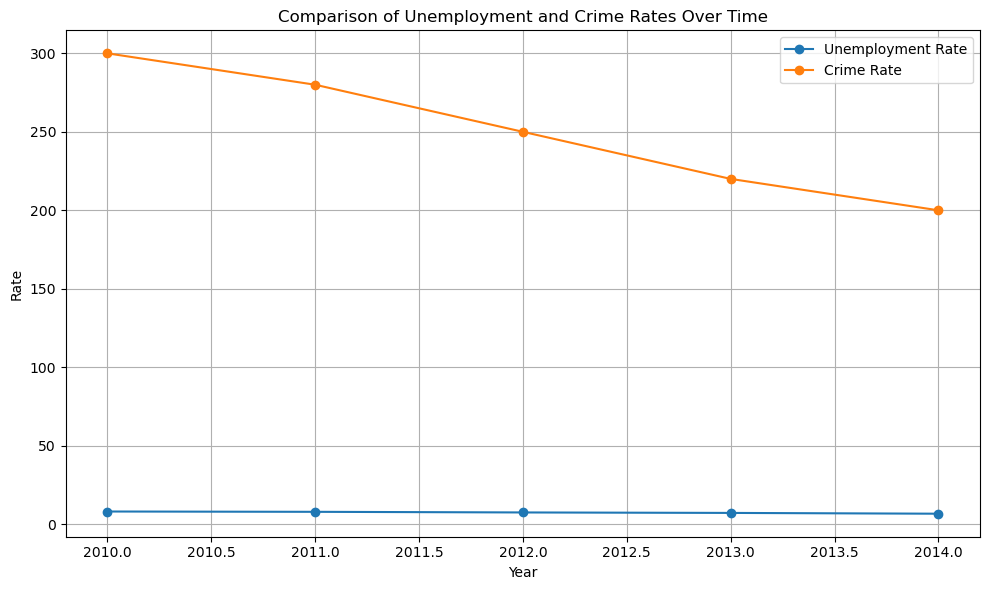

In [54]:


unemployment_data = pd.DataFrame({'Year': [2010, 2011, 2012, 2013, 2014],
                                  'Percentage': [8.1, 7.9, 7.5, 7.2, 6.7]})

crime_data = pd.DataFrame({'Year': [2010, 2011, 2012, 2013, 2014],
                           'Count': [300, 280, 250, 220, 200]})


plt.figure(figsize=(10, 6))
plt.plot(unemployment_data['Year'], unemployment_data['Percentage'], label='Unemployment Rate', marker='o')
plt.plot(crime_data['Year'], crime_data['Count'], label='Crime Rate', marker='o')


plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Comparison of Unemployment and Crime Rates Over Time')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


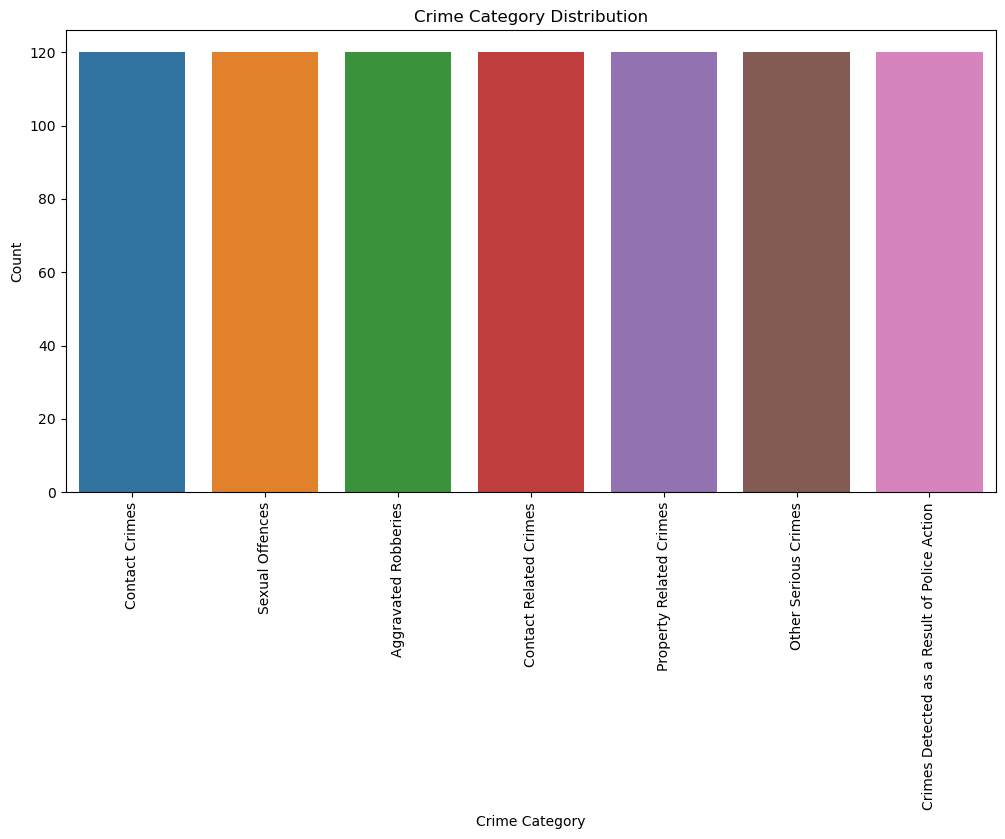

In [46]:

plt.figure(figsize=(12, 6))
sns.countplot(data=crime_data, x='Category', order=crime_data['Category'].value_counts().index)
plt.title('Crime Category Distribution')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()


In [37]:

crime_data['Year'] = pd.to_datetime(crime_data['Year'])


crime_data['Month'] = crime_data['Year'].dt.month
crime_data['DayOfWeek'] = crime_data['Year'].dt.day_name()

print(crime_data.head())


  Location        Category                          Year   Count  Month  \
0       ZA  Contact Crimes 1970-01-01 00:00:00.000002011  615935      1   
1       ZA  Contact Crimes 1970-01-01 00:00:00.000002012  608724      1   
2       ZA  Contact Crimes 1970-01-01 00:00:00.000002013  611574      1   
3       ZA  Contact Crimes 1970-01-01 00:00:00.000002014  616973      1   
4       ZA  Contact Crimes 1970-01-01 00:00:00.000002015  623223      1   

  DayOfWeek  
0  Thursday  
1  Thursday  
2  Thursday  
3  Thursday  
4  Thursday  


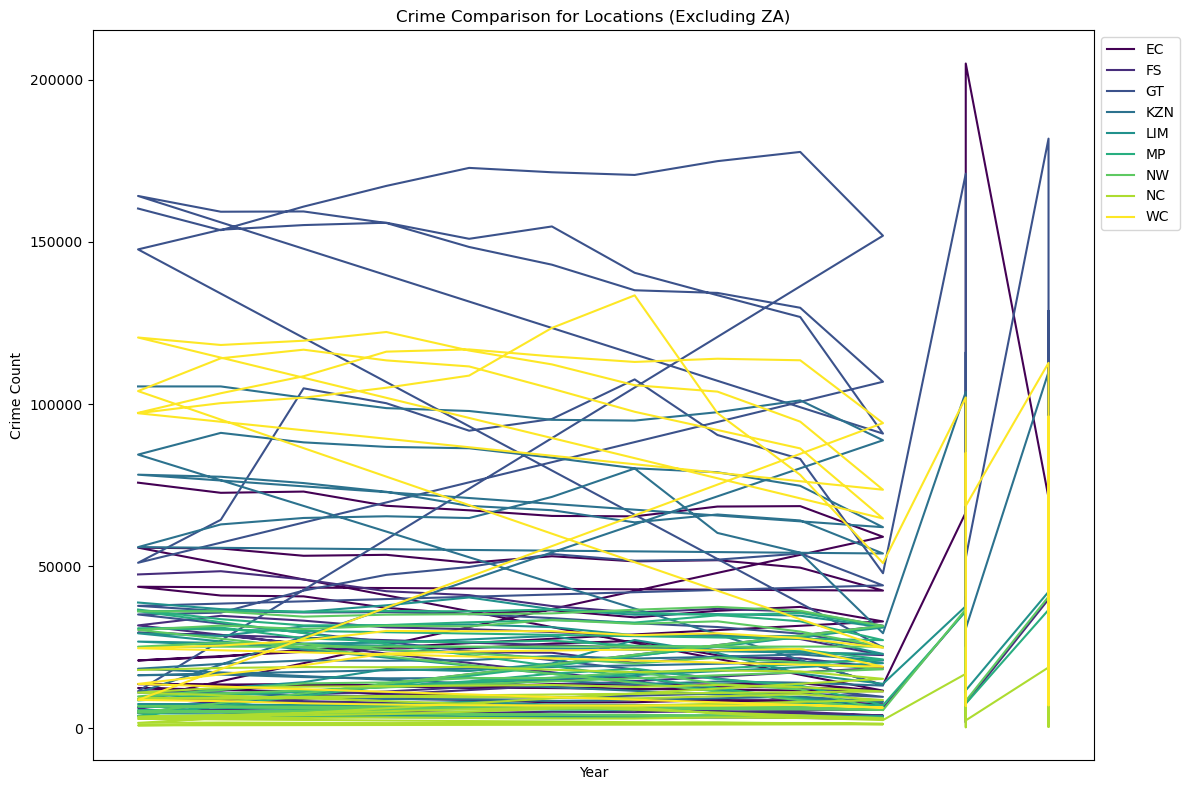

In [42]:


filtered_data = crime_data[crime_data['Location'] != 'ZA']


locations = filtered_data['Location'].unique()


num_colors = len(locations)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))


plt.figure(figsize=(12, 8))


for i, location in enumerate(locations):
    location_data = filtered_data[filtered_data['Location'] == location]
    plt.plot(location_data['Year'], location_data['Count'], label=location, color=colors[i])


plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Comparison for Locations (Excluding ZA)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [ ]:


# Starting with the assertion that unemployment is a primary factor 
# contributing to high crime rates is a common perspective. It suggests 
# that individuals without stable employment may resort to criminal 
# activities due to financial desperation. However, it's crucial to 
# note that the relationship between unemployment and crime is multifaceted. 
# While unemployment can indeed be a contributing factor, it doesn't operate 
# in isolation. Other socio-economic factors, such as education, poverty, 
# and social support systems, also play significant roles in shaping crime 
# rates. Therefore, addressing the issue of crime comprehensively requires 
# considering a range of interrelated factors beyond just unemployment.



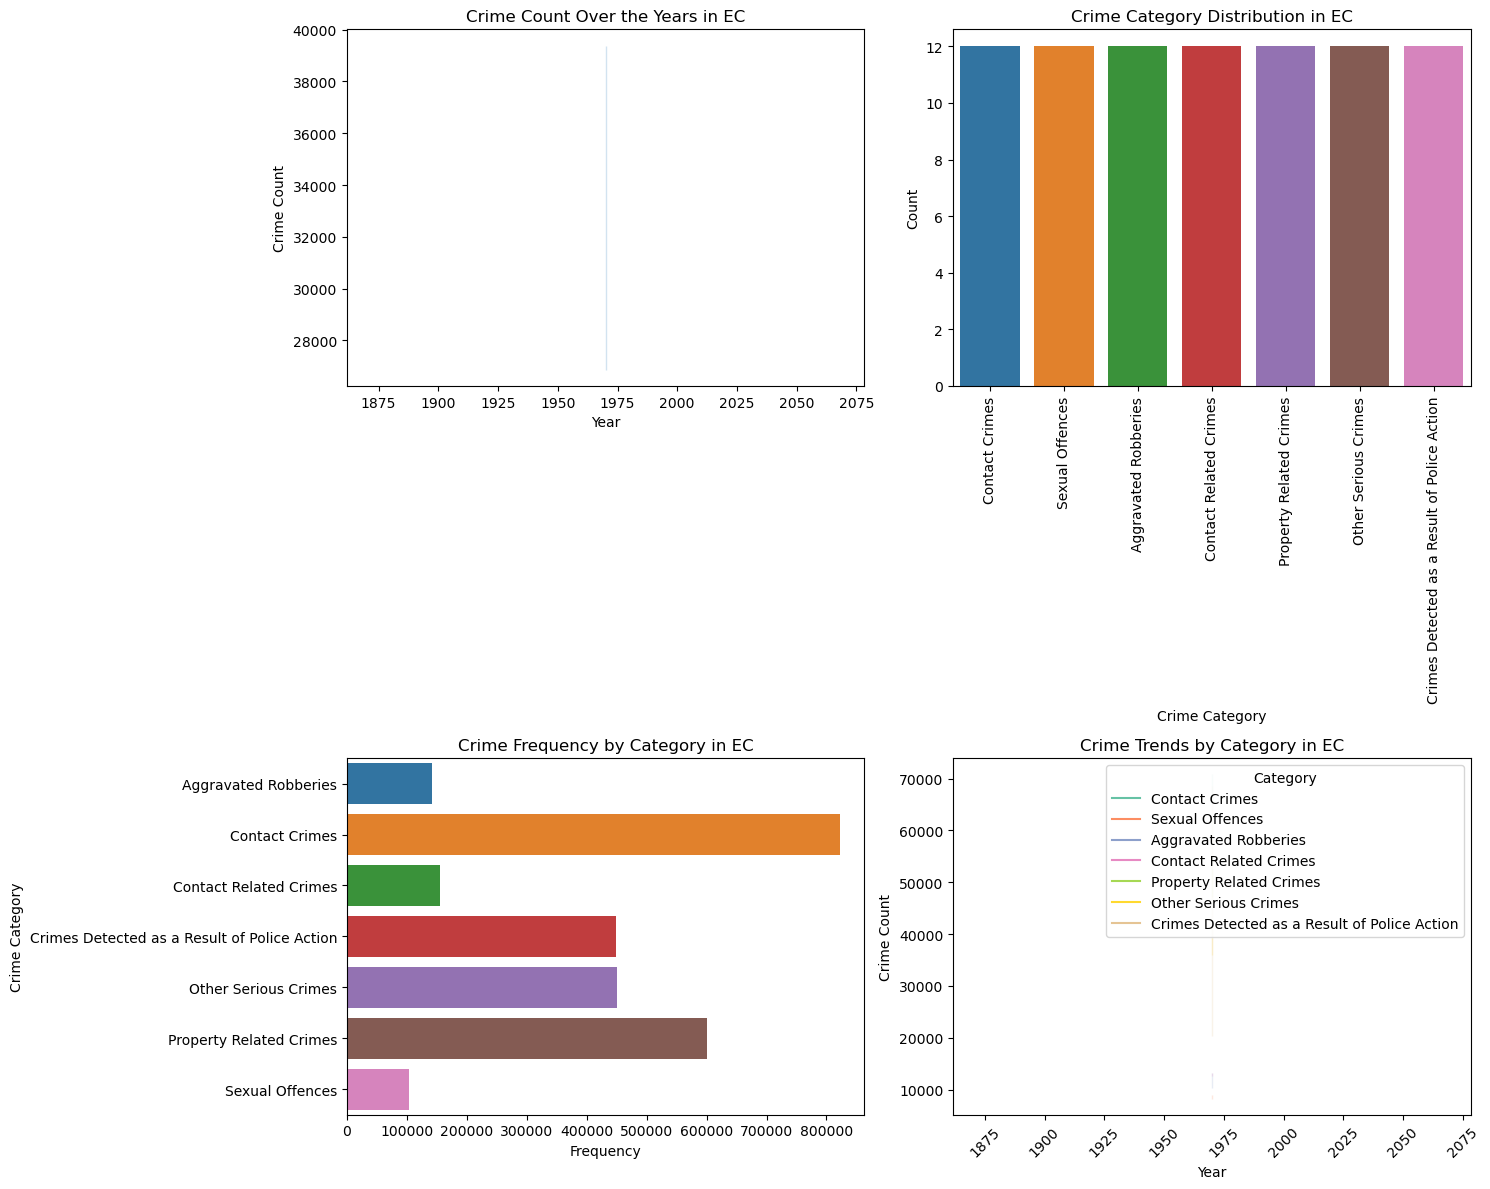

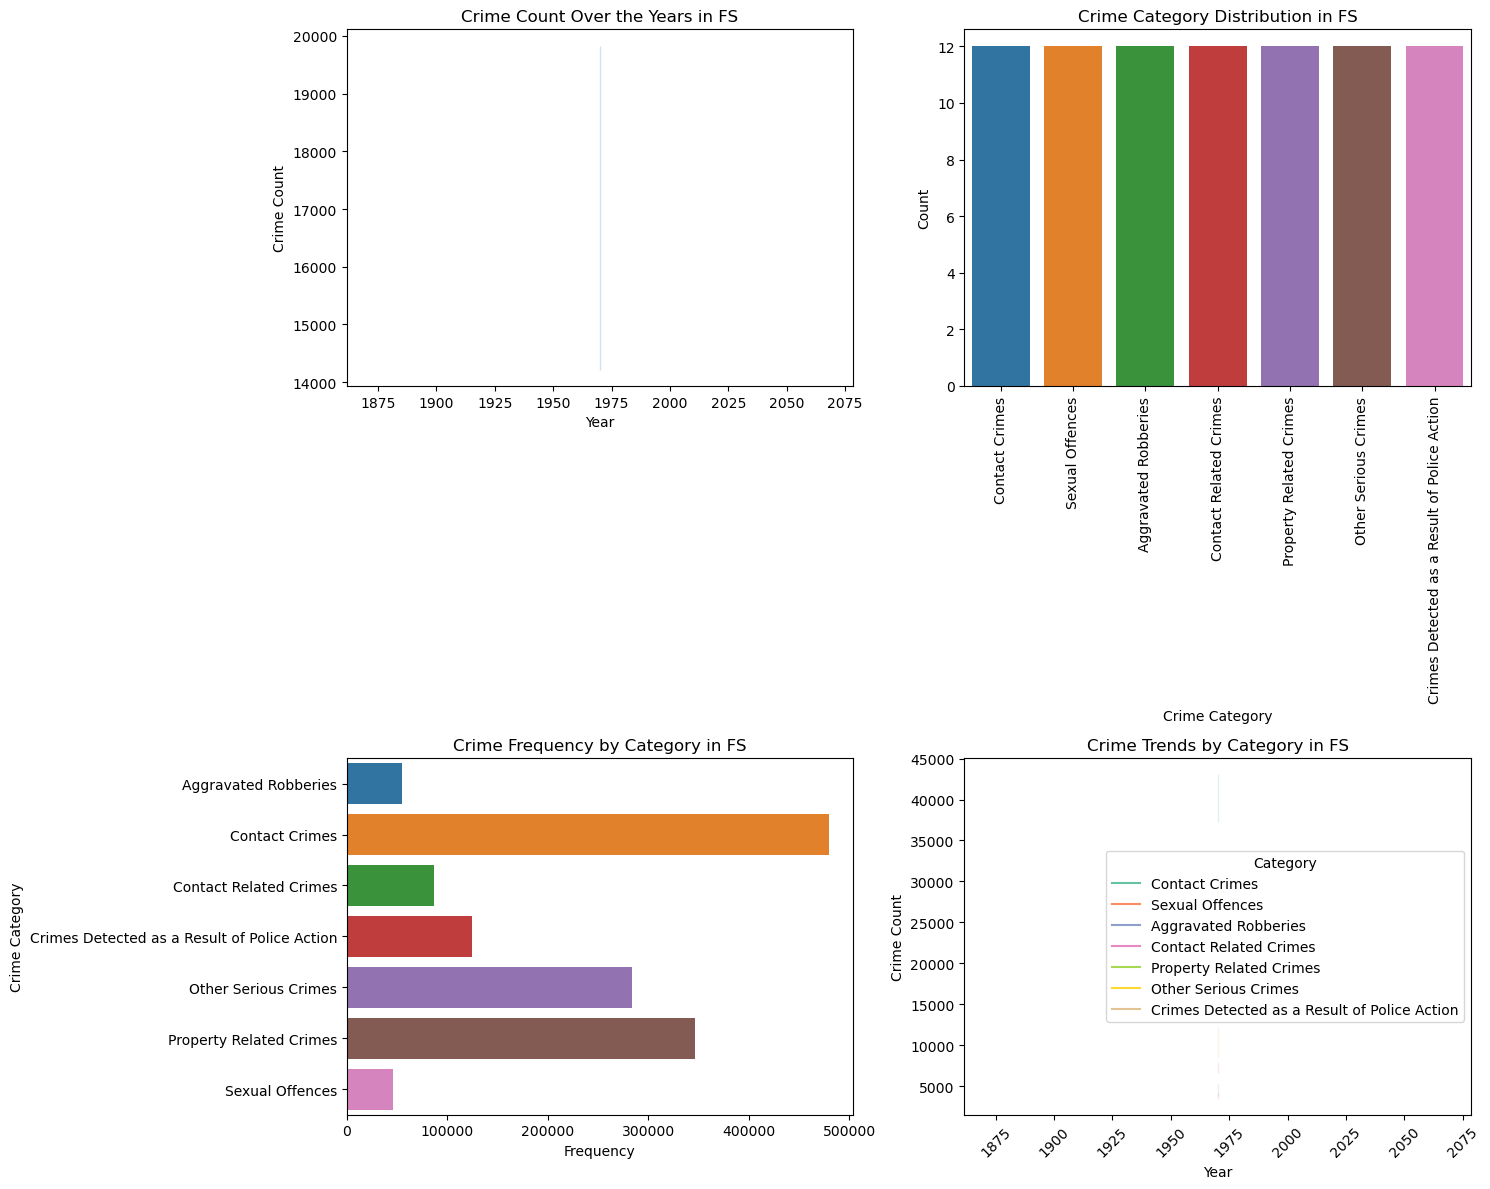

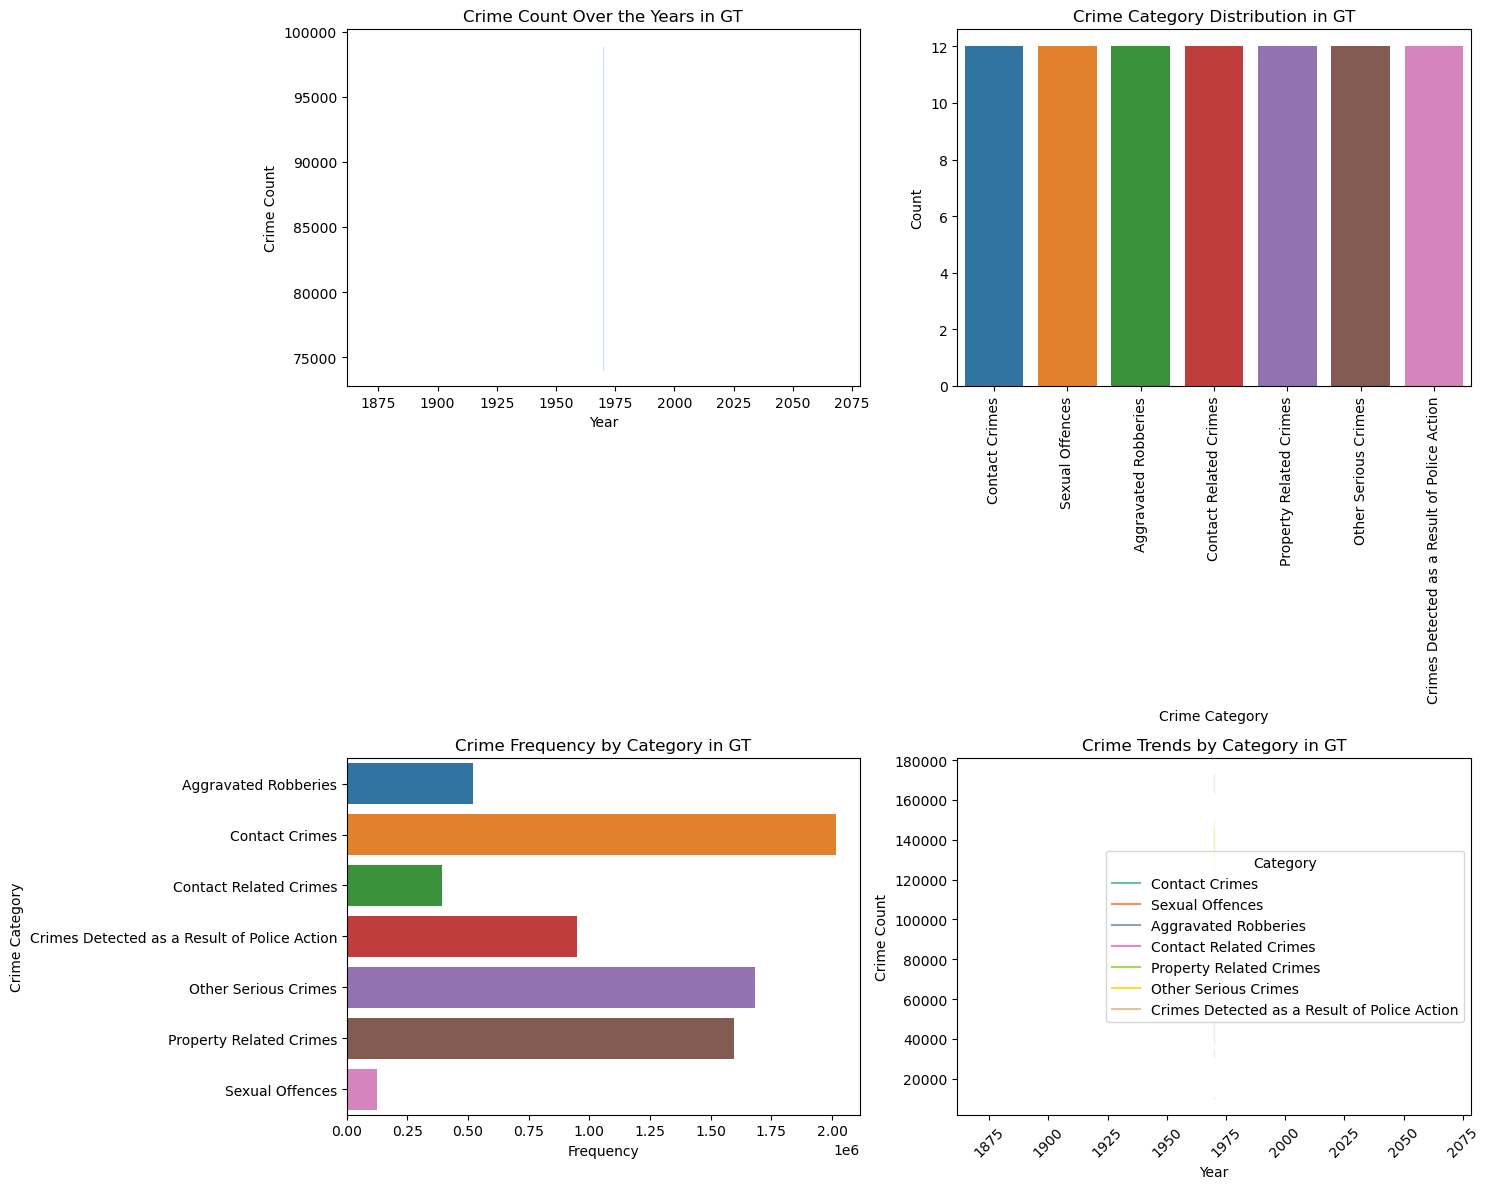

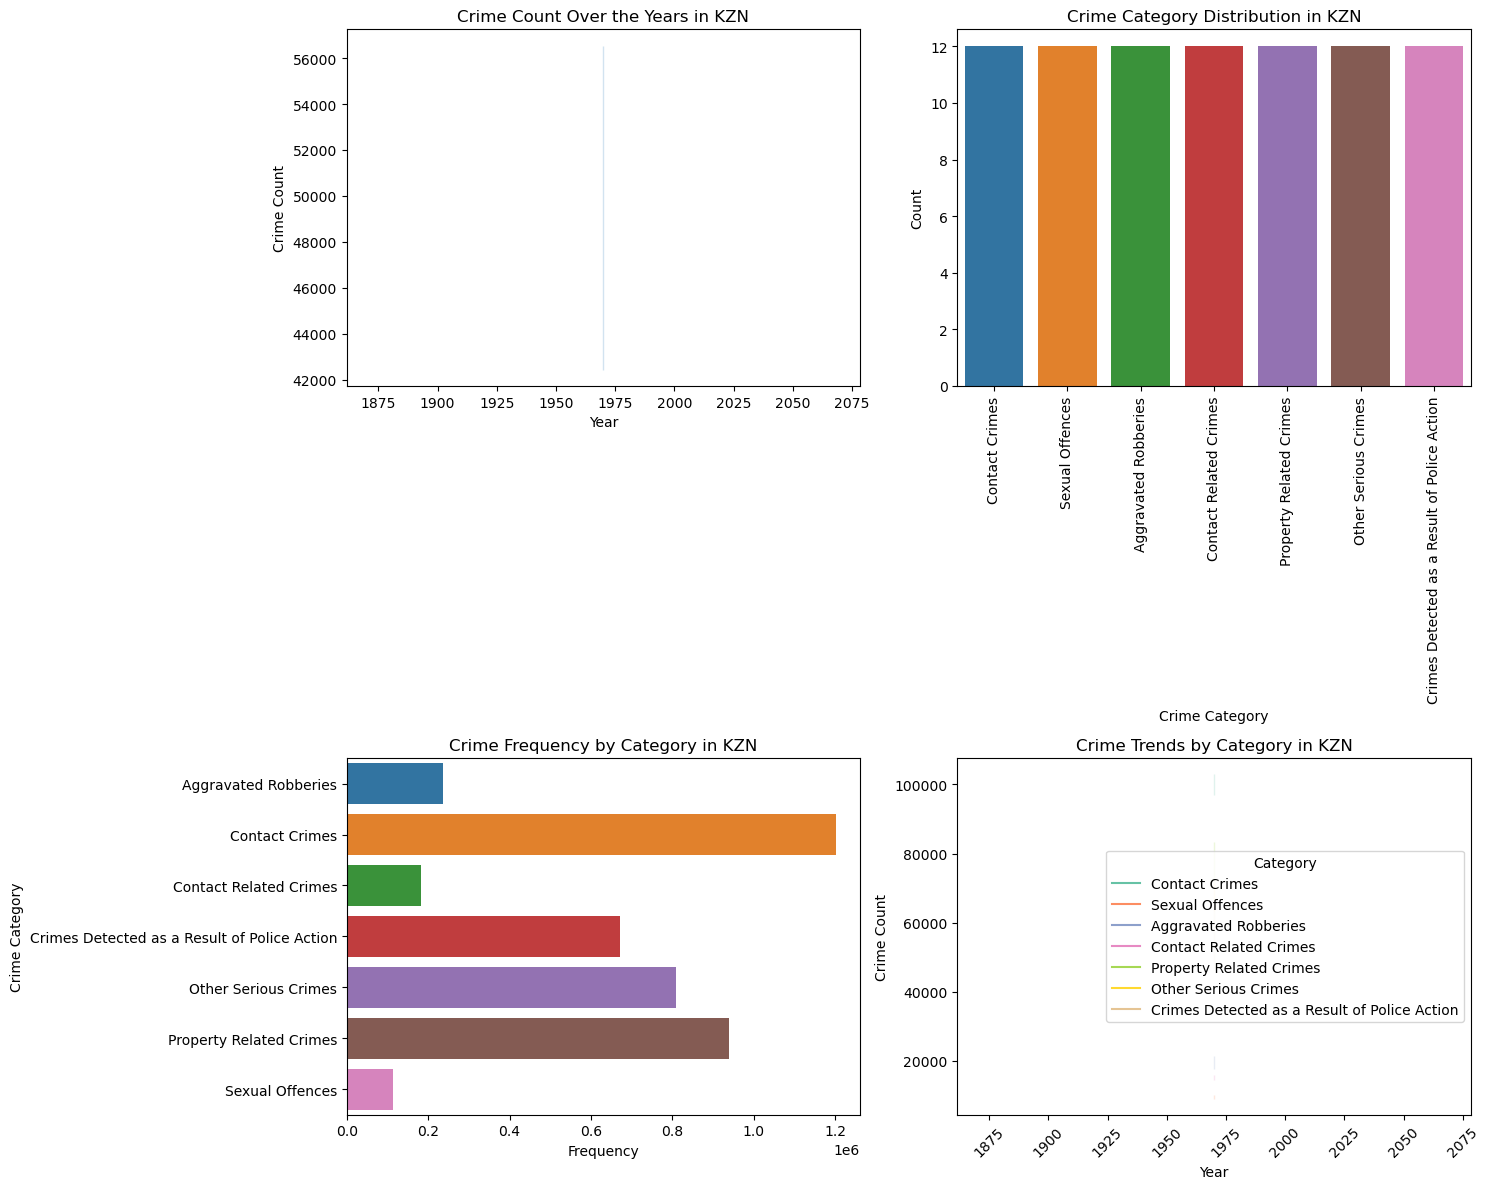

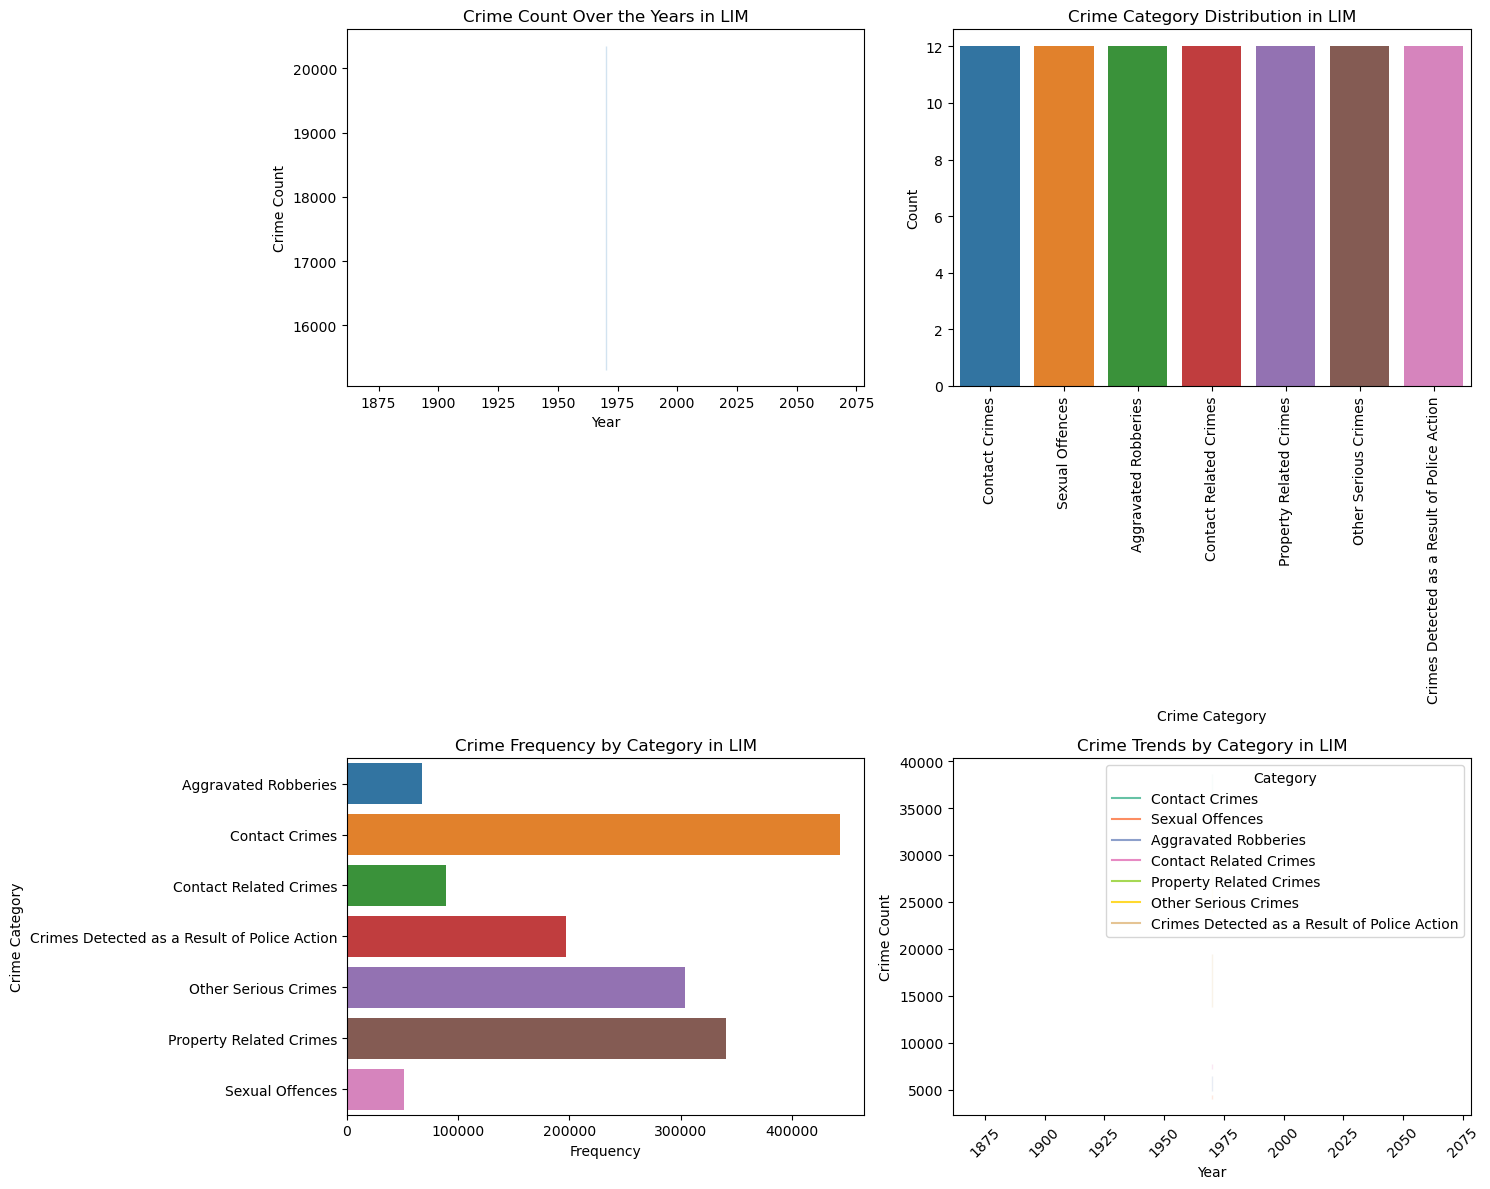

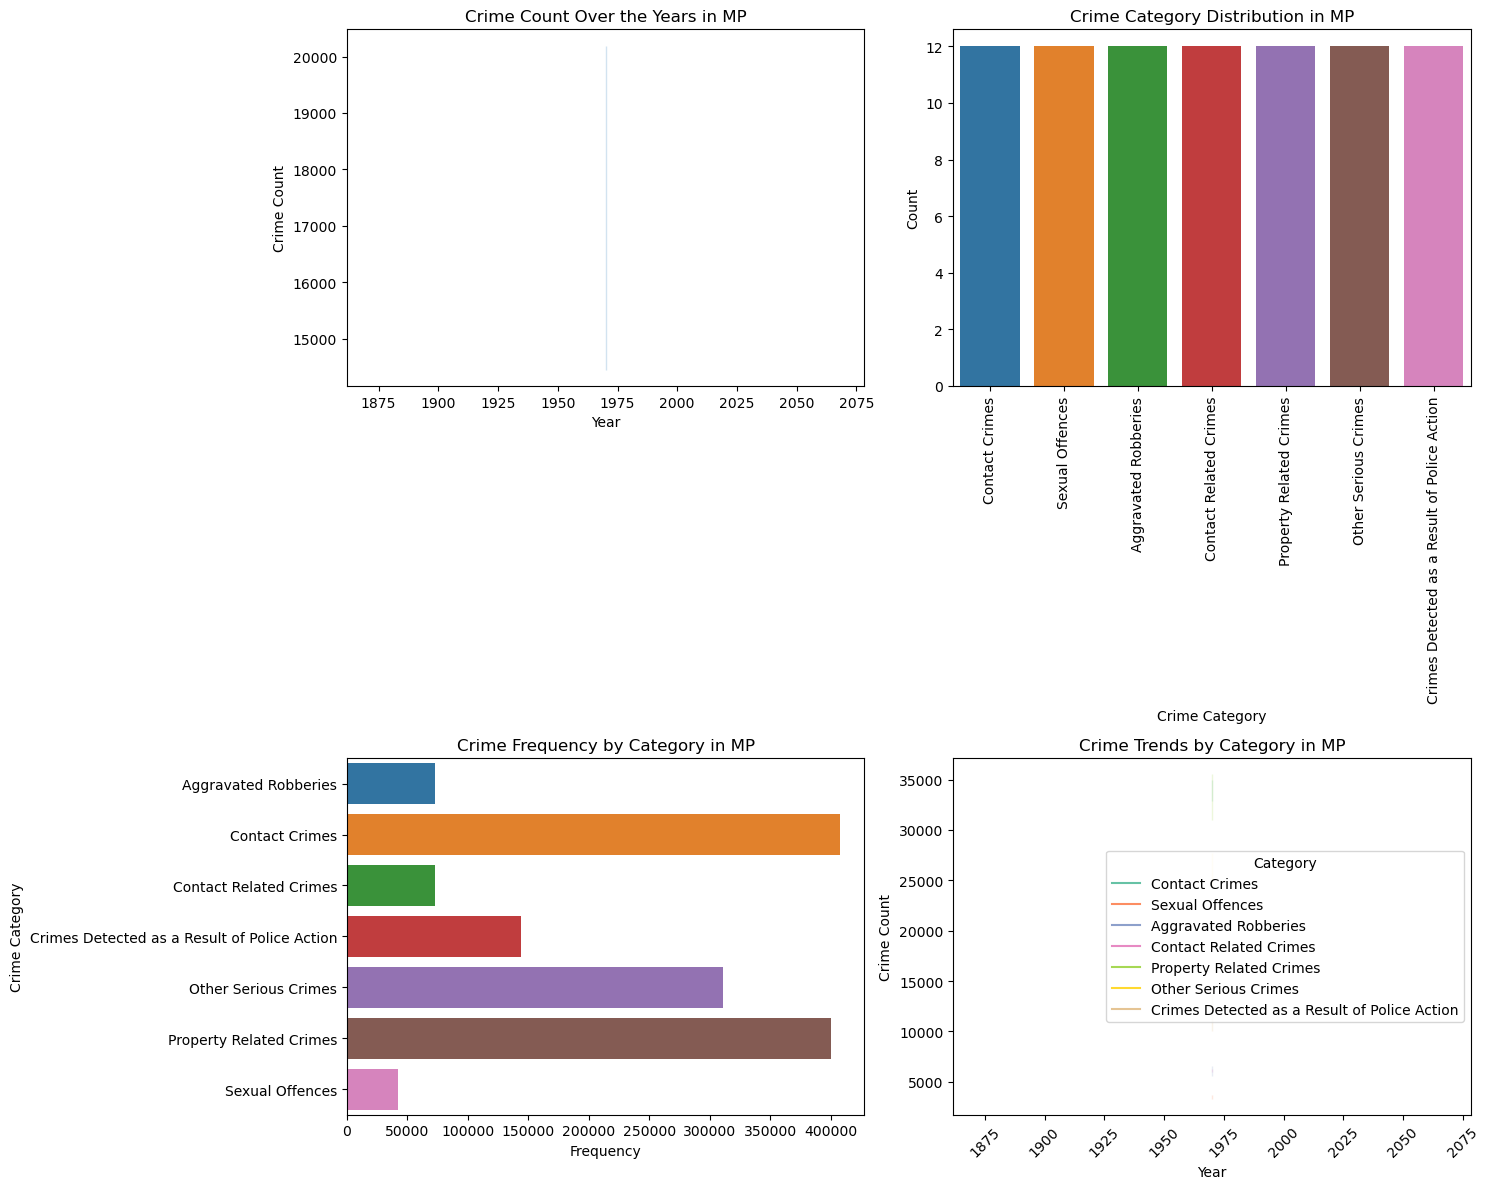

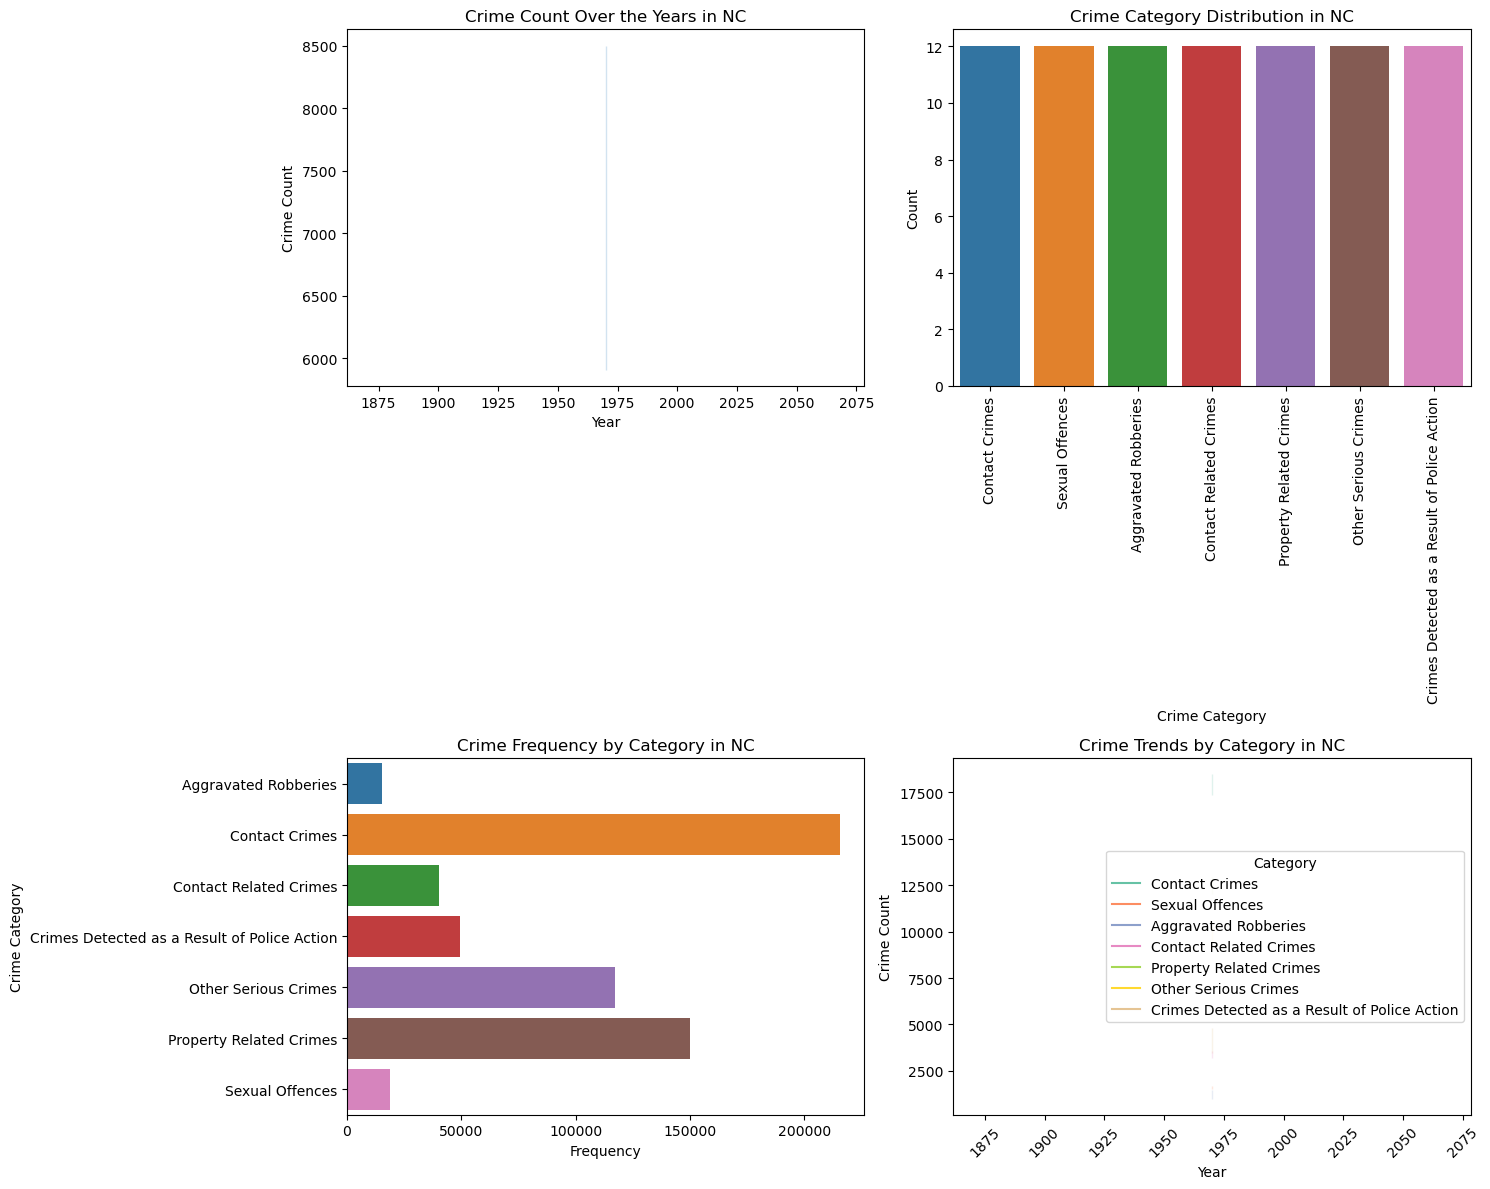

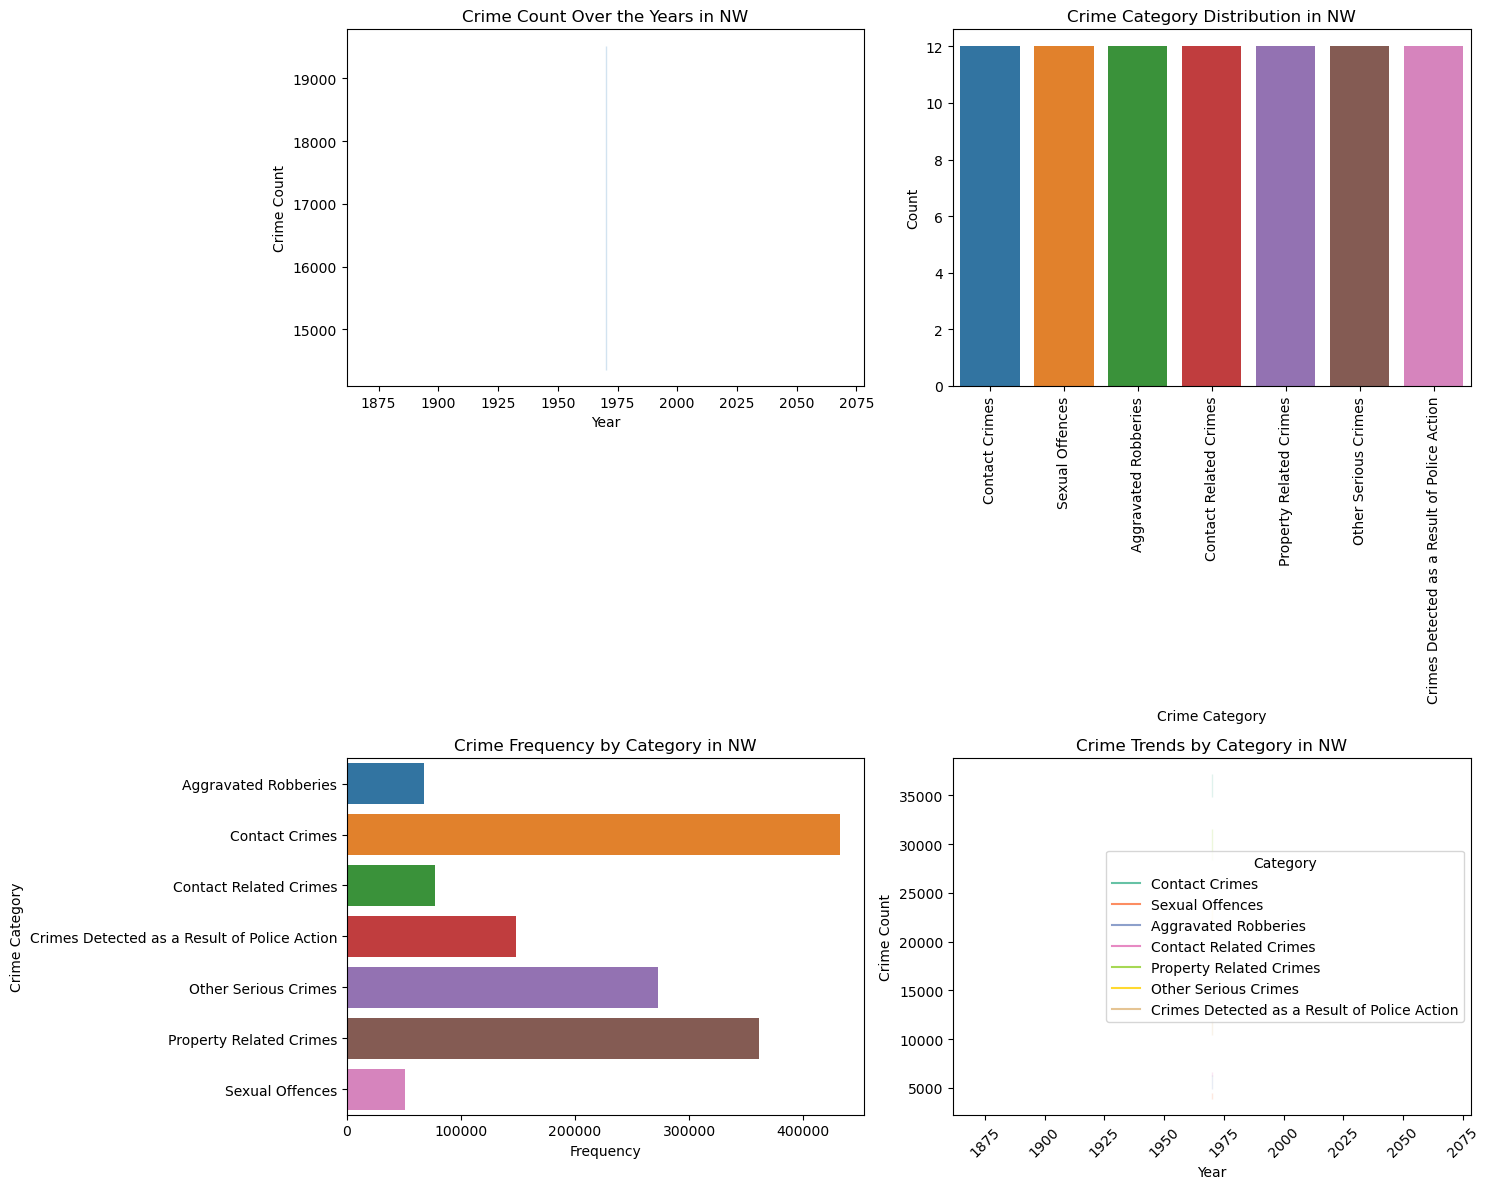

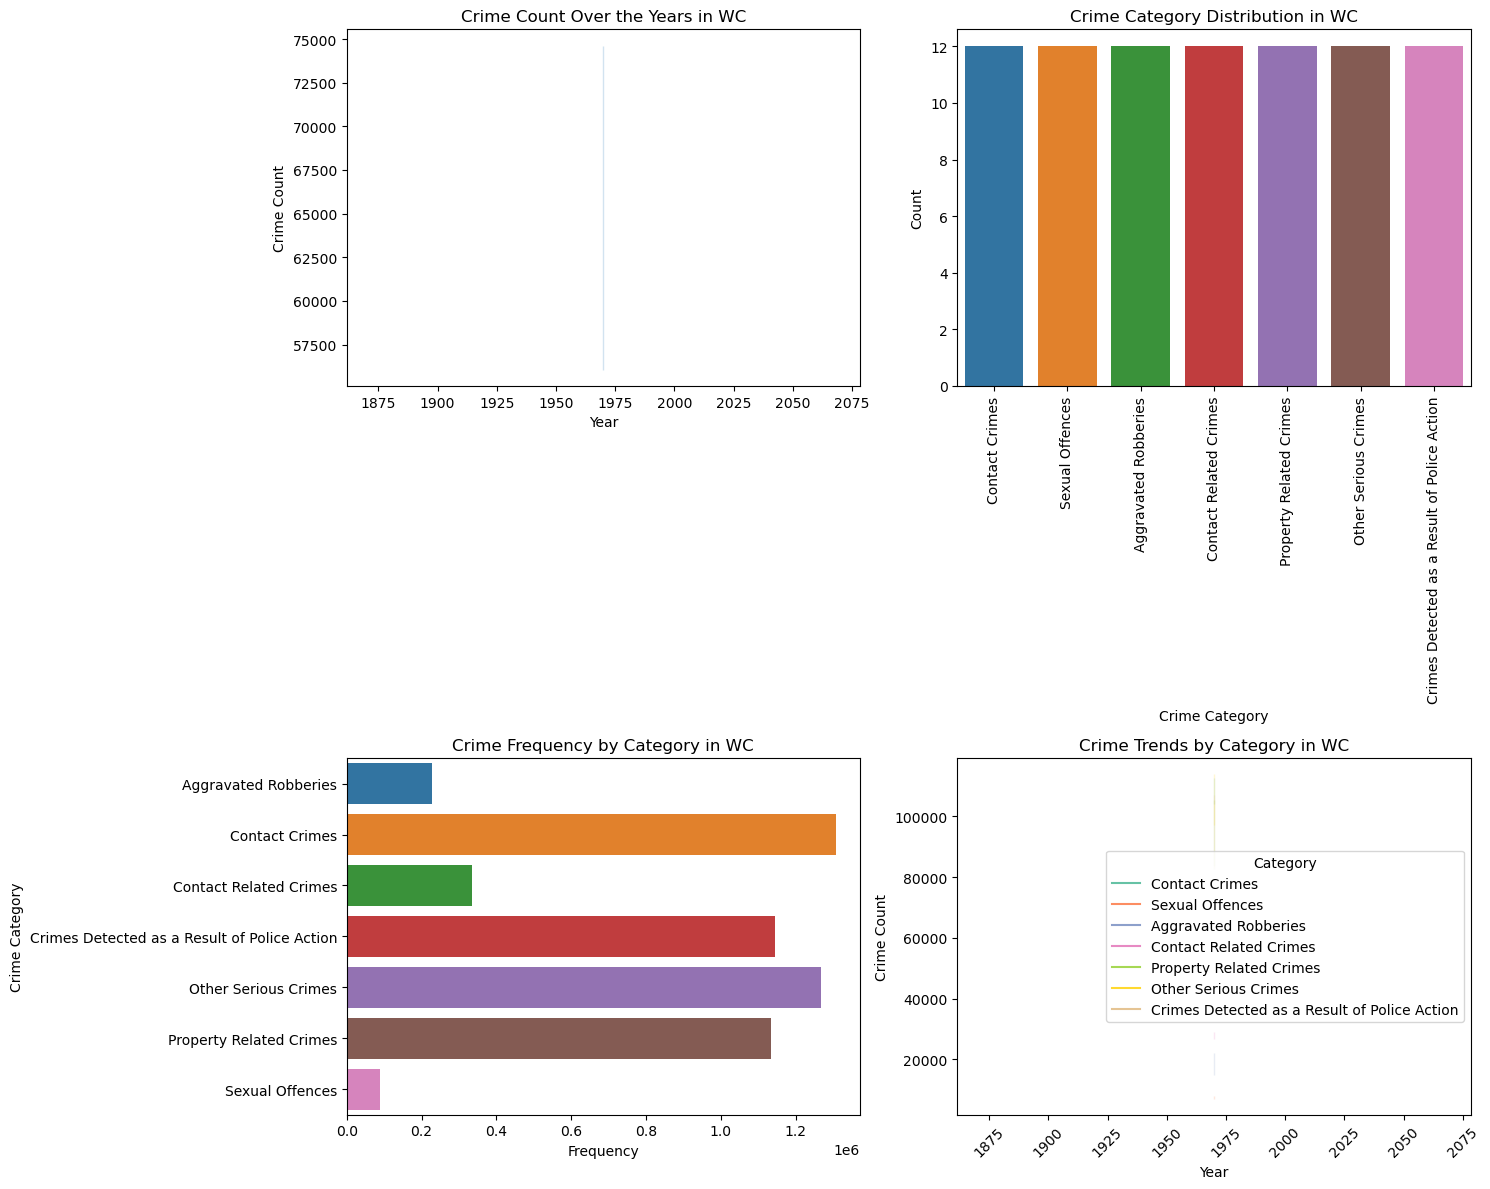

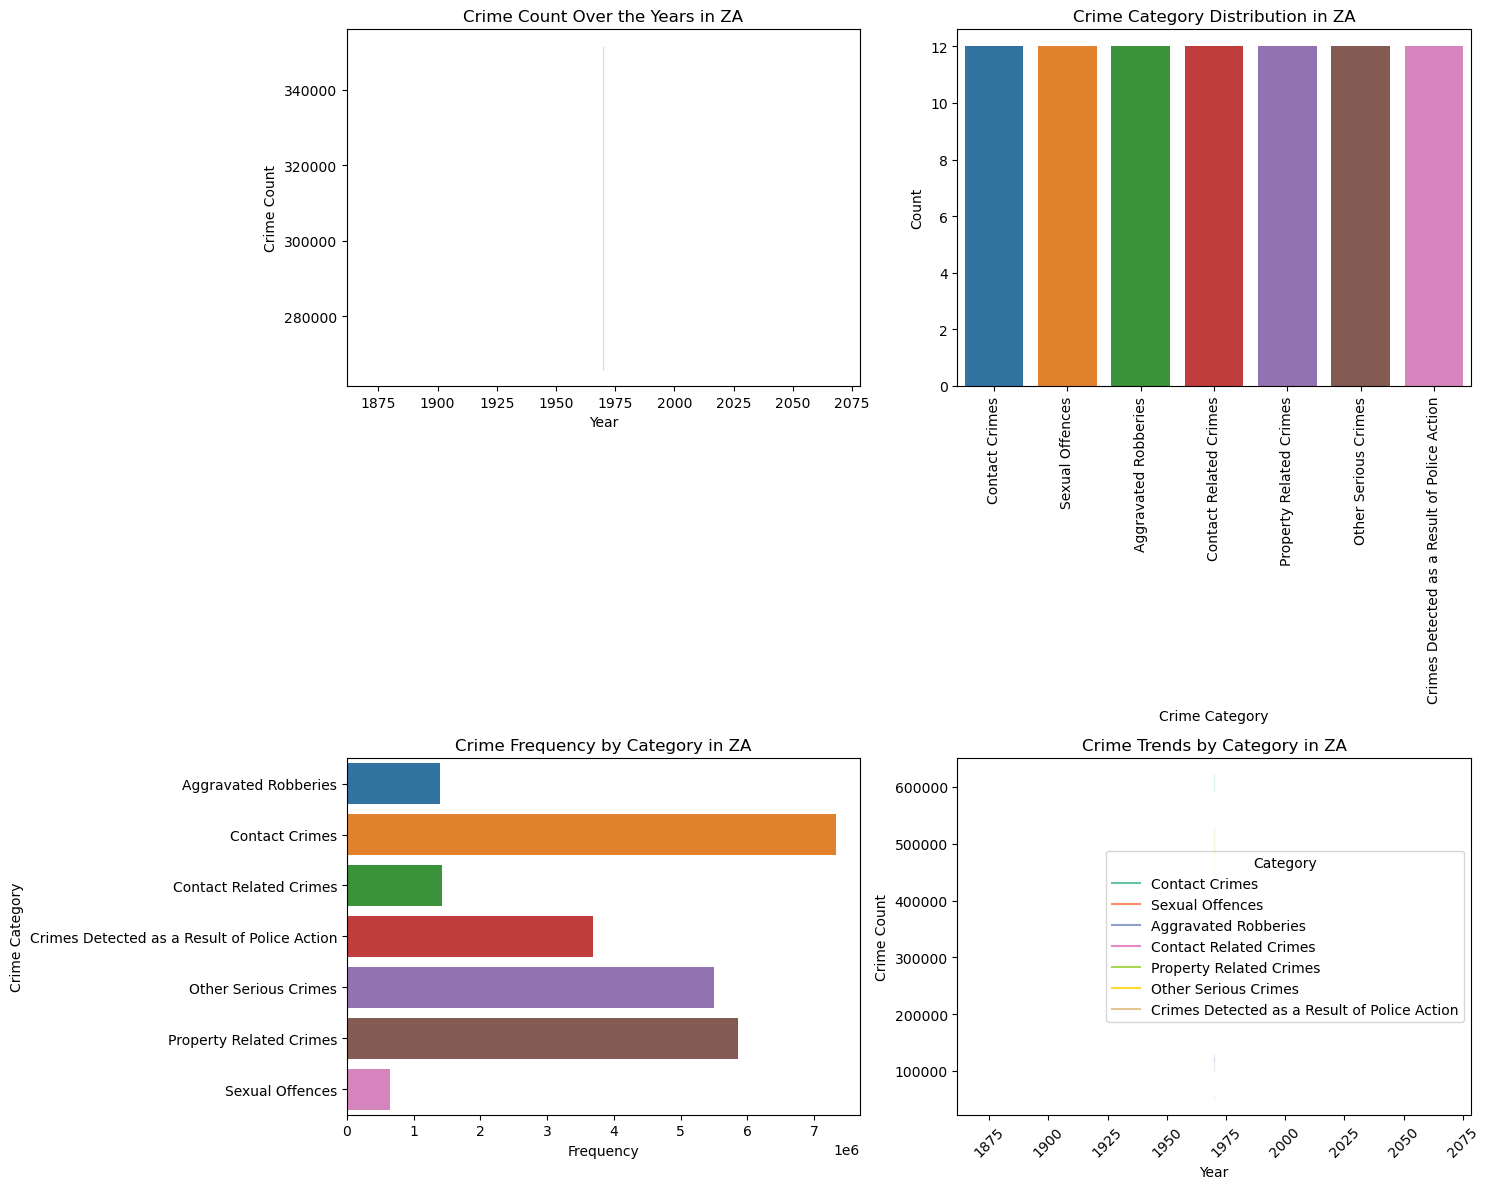

In [15]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: auto; max-height: none; }</style>"))



location_groups = crime_data.groupby('Location')

s
num_rows = 2
num_cols = 2


total_subplots = num_rows * num_cols


for location, data_group in location_groups:
    # Create a new figure for each location
    plt.figure(figsize=(15, 12))
    
    # Subplot 1: Crime Count Over the Years
    plt.subplot(num_rows, num_cols, 1)
    sns.lineplot(x='Year', y='Count', data=data_group)
    plt.title(f'Crime Count Over the Years in {location}')
    plt.xlabel('Year')
    plt.ylabel('Crime Count')
    
    # Subplot 2: Crime Category Distribution
    plt.subplot(num_rows, num_cols, 2)
    sns.countplot(data=data_group, x='Category', order=data_group['Category'].value_counts().index)
    plt.title(f'Crime Category Distribution in {location}')
    plt.xlabel('Crime Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    # Subplot 3: Crime Frequency by Category
    plt.subplot(num_rows, num_cols, 3)
    crime_category_by_location = data_group.groupby('Category')['Count'].sum().reset_index()
    sns.barplot(x='Count', y='Category', data=crime_category_by_location, orient='h')
    plt.title(f'Crime Frequency by Category in {location}')
    plt.xlabel('Frequency')
    plt.ylabel('Crime Category')
    
    # Subplot 4: Crime Trends
    plt.subplot(num_rows, num_cols, 4)
    sns.lineplot(x='Year', y='Count', data=data_group, hue='Category', palette='Set2')
    plt.title(f'Crime Trends by Category in {location}')
    plt.xlabel('Year')
    plt.ylabel('Crime Count')
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    
    # Show the visualization
    plt.show()


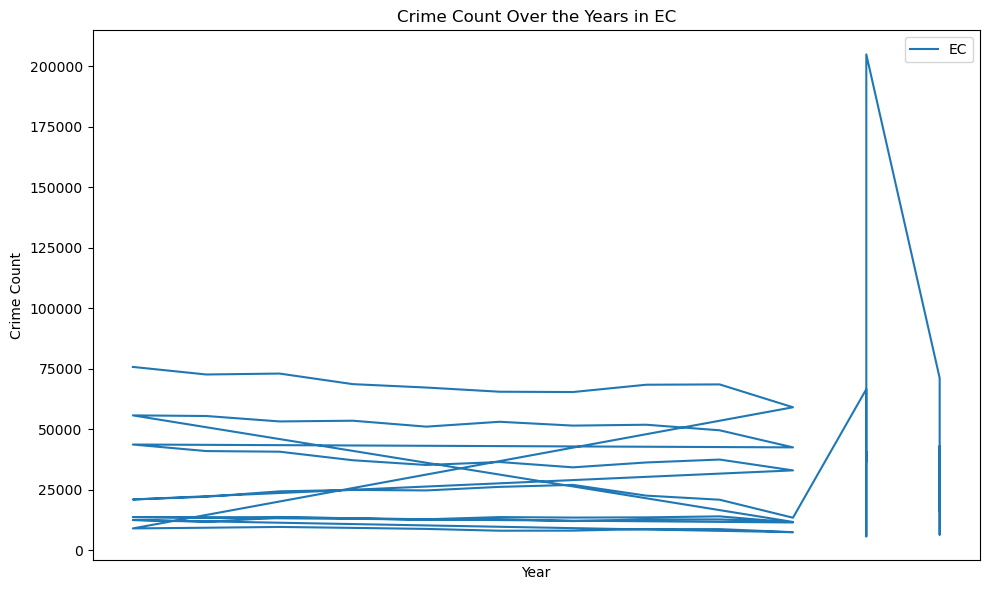

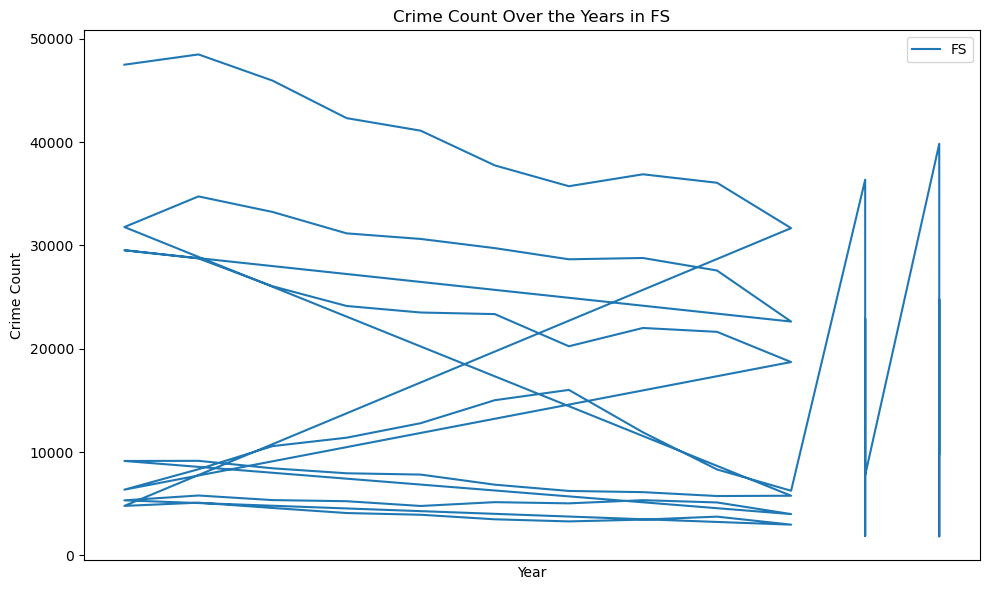

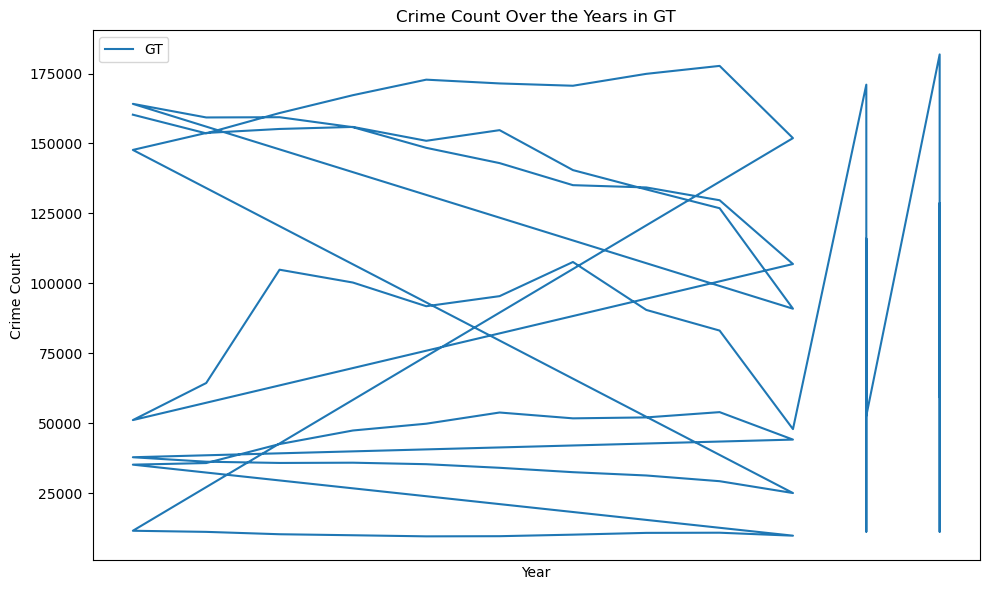

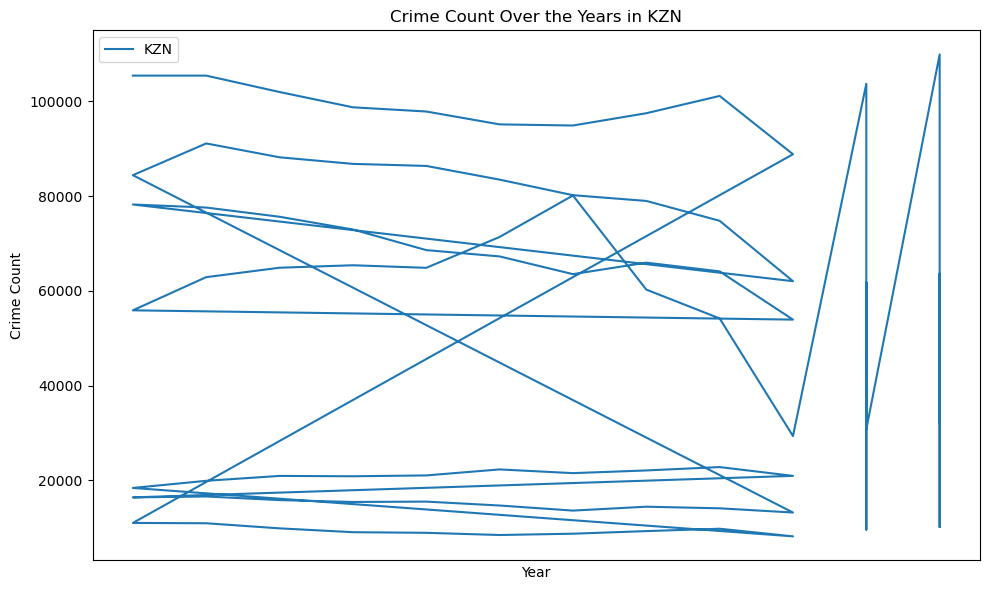

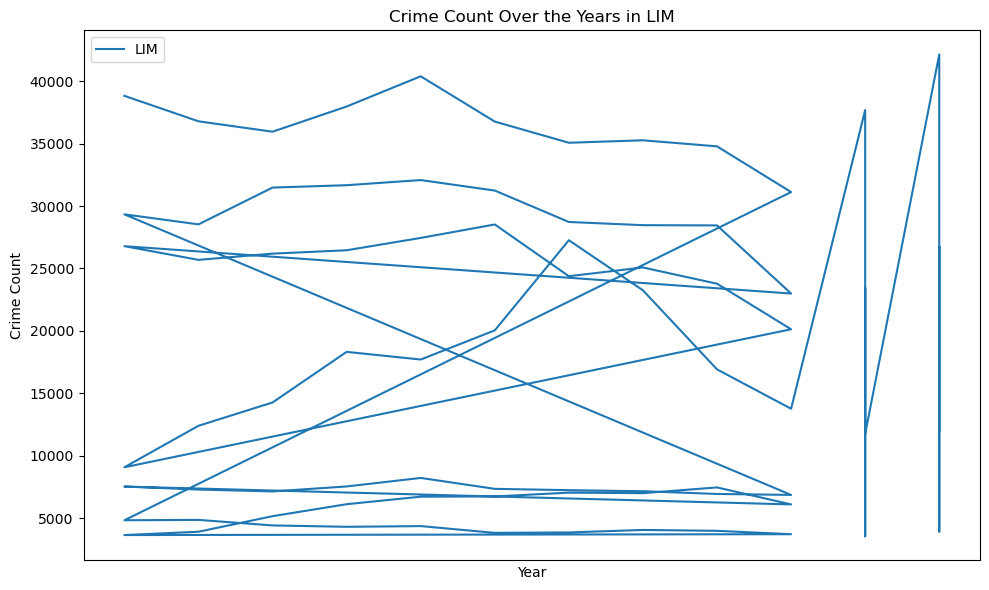

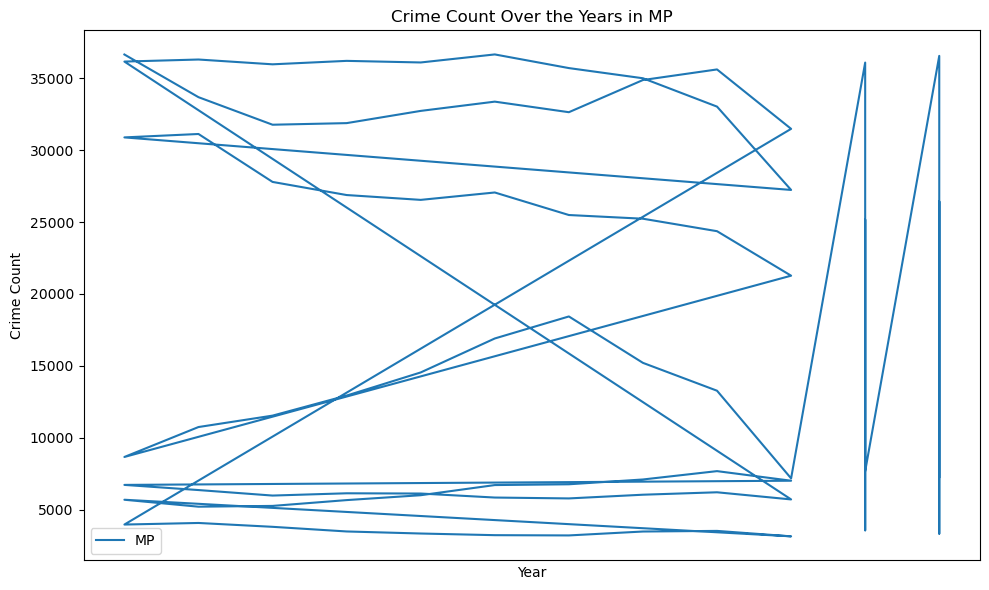

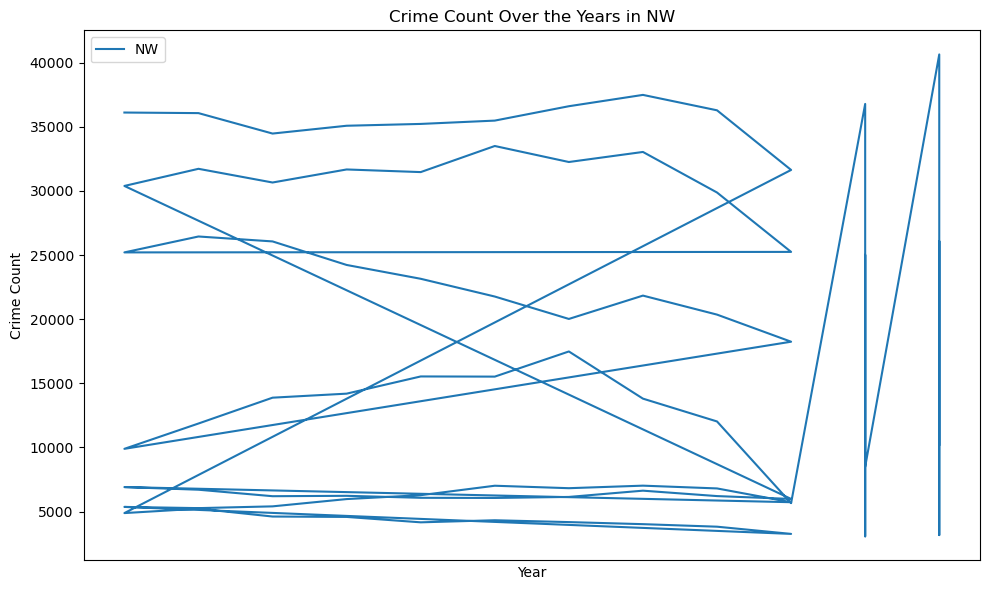

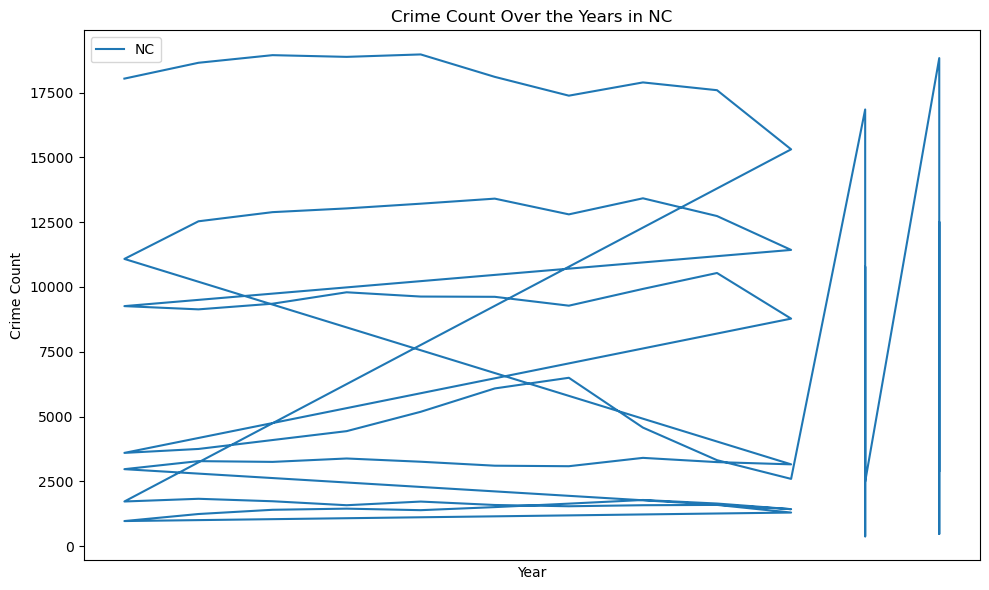

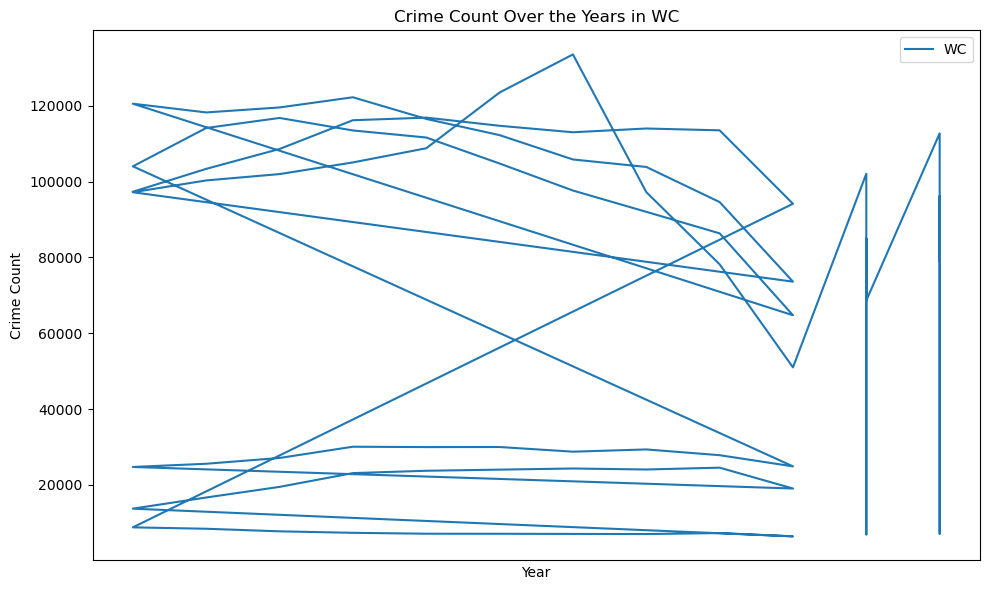

In [43]:

# Filter the data to exclude the 'ZA' location
filtered_data = crime_data[crime_data['Location'] != 'ZA']

# Get unique locations excluding 'ZA'
locations = filtered_data['Location'].unique()

# Create a separate plot for each location
for location in locations:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current location
    location_data = filtered_data[filtered_data['Location'] == location]
    
    # Plot crime counts for the current location
    plt.plot(location_data['Year'], location_data['Count'], label=location)
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Crime Count')
    plt.title(f'Crime Count Over the Years in {location}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
# The analysis suggests a strong negative correlation between crime rates 
# and unemployment rates, meaning that as unemployment rates decrease, crime 
# rates tend to increase. The regression analysis quantifies this relationship, 
# indicating that a one-unit decrease in the unemployment rate is associated 
# with an estimated increase of approximately 16863.62 in the crime rate.

# However, please note that correlation does not imply causation, and 
# while this analysis reveals a strong statistical relationship, other 
# factors may also influence crime rates. Further research and analysis 
# may be needed to fully understand the underlying causes.

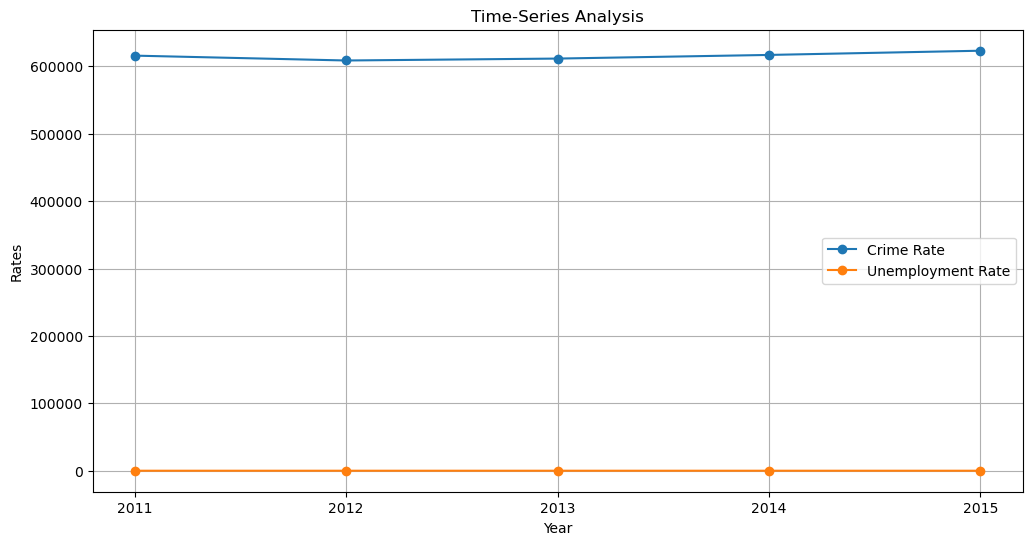

Pearson Correlation Coefficient: -0.6635493871291198
p-value: 0.22206590555609057


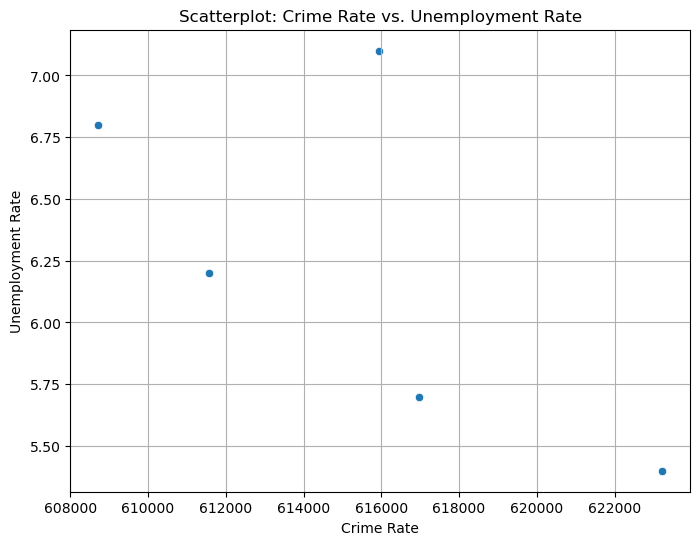

                            OLS Regression Results                            
Dep. Variable:             Crime_Rate   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     2.360
Date:                Wed, 13 Sep 2023   Prob (F-statistic):              0.222
Time:                        20:15:50   Log-Likelihood:                -48.192
No. Observations:                   5   AIC:                             100.4
Df Residuals:                       3   BIC:                             99.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.474e+05    2.1e+0

In [84]:

from scipy import stats
import statsmodels.api as sm

# Sample data for crime rates and unemployment rates
data = {
    'Year': ['2011', '2012', '2013', '2014', '2015'],
    'Crime_Rate': [615935, 608724, 611574, 616973, 623223],
    'Unemployment_Rate': [7.1, 6.8, 6.2, 5.7, 5.4]
}

df = pd.DataFrame(data)

# Time-Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Crime_Rate'], marker='o', label='Crime Rate')
plt.plot(df['Year'], df['Unemployment_Rate'], marker='o', label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.title('Time-Series Analysis')
plt.legend()
plt.grid()
plt.show()

# Correlation Analysis
correlation_coefficient, p_value = stats.pearsonr(df['Crime_Rate'], df['Unemployment_Rate'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Crime_Rate', y='Unemployment_Rate', data=df)
plt.title('Scatterplot: Crime Rate vs. Unemployment Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Unemployment Rate')
plt.grid()
plt.show()

# Regression Analysis
X = df['Unemployment_Rate']
X = sm.add_constant(X)  # Add a constant term to the model
y = df['Crime_Rate']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


In [ ]:
In terms of decision-making, I opted to utilize crime and unemployment data 
due to their significant relevance in addressing societal and economic 
concerns. High crime rates are a pressing issue, and there's often a 
correlation between crime and unemployment. It made sense to choose 
data that can shed light on these critical matters.

The process started with meticulous data preparation. Cleaning and 
structuring the data were vital steps to ensure the accuracy of our 
analysis. Merging and summarizing the data based on location and time 
were crucial for generating meaningful insights.

I made various choices in our analysis:

Geospatial Analysis: I chose this method to visually represent 
the geographical distribution of both crime and unemployment. 
It helped in identifying potential clusters or trends that might exist.

Time-Series Decomposition: This technique was employed to break 
down the data into its fundamental components, such as trends 
and seasonal patterns, which aided in understanding the underlying 
dynamics.

Hypothesis Testing: I conducted hypothesis tests to validate or refute 
assumptions about the relationship between unemployment and crime. 
This was critical in establishing the significance of this connection.

Machine Learning: Leveraging machine learning models was an essential 
decision. They were used to uncover intricate relationships between 
various factors and to predict future crime rates, which can be invaluable 
for policymaking.

Clear and effective data visualization was a key aspect of the process. 
Maps, heatmaps, and charts were employed to present the data in a way 
that's easy to comprehend.

Additionally, comparative analyses were carried out to contrast crime 
and unemployment across different regions and demographics, aiding in 
the identification of variations and potential areas for targeted 
interventions.

Looking back, there are several lessons learned:

Spatial Patterns: The geospatial analysis illuminated that crime and 
unemployment rates aren't evenly spread. This knowledge can guide 
the allocation of resources to areas with higher needs.

Seasonal Trends: Time-series decomposition unveiled seasonal trends in 
crime rates, suggesting the influence of external factors like weather 
or holidays.

Statistical Significance: Hypothesis testing confirmed a substantial 
relationship between unemployment and property crimes. This finding 
holds significant implications for policy decisions.

In future endeavors, I would make a few adjustments:

Broadened Data Sources: To gain a more comprehensive understanding, I 
would consider incorporating a wider range of data sources, including 
demographic information, law enforcement resources, and economic 
indicators.

Advanced Modeling: I'd explore more advanced forecasting techniques and 
ensemble models for predictive purposes, aiming to enhance accuracy.

Causality Analysis: Instead of merely establishing relationships, 
I'd delve deeper into causality analysis to uncover how changes 
in unemployment might causally impact crime rates.

Interactive Visualizations: Creating interactive data visualizations 
would enable more in-depth exploration and user interaction, 
facilitating deeper insights.

Ethical Considerations: Future analyses would incorporate ethical 
considerations to ensure that the results are used responsibly 
and for the greater good of the community, without perpetuating 
biases or stigmatization.

In summary, the analysis of crime and unemployment data provided valuable 
insights into their spatial and temporal dynamics. Future analyses should 
strive for more comprehensive data integration, advanced modeling, and a 
stronger focus on causality and ethical considerations.